In [1]:
import ROOT
import numpy as np
from matplotlib import pyplot as plt
import array
import os, sys
from multiprocessing import Pool
from matplotlib import rcParams
import time
%jsroot on
rcParams['axes.titlepad'] = 20 
ROOT.gInterpreter.ProcessLine(".L LoopLineShape.cpp")
ROOT.gInterpreter.ProcessLine(".L ParamOptimization.cpp")

Welcome to JupyROOT 6.28/06


In file included from input_line_49:1:
/home/adriano/Documents/ALPHA/ALPHA-2/LineShape/ParamOptimization.cpp:33:28: error: no member named 'x_cb_start' in 'ReadConfFile'
        double startPdf1 = Params.x_cb_start - (FrequencyStep)*(Params.BinBeforeOnset + 0.5);   // Start of frequency sweep c-b
                           ~~~~~~ ^
/home/adriano/Documents/ALPHA/ALPHA-2/LineShape/ParamOptimization.cpp:34:28: error: no member named 'x_da_start' in 'ReadConfFile'
        double startPdf2 = Params.x_da_start - (FrequencyStep)*(Params.BinBeforeOnset + 0.5);   // Start of frequency sweep d-a
                           ~~~~~~ ^
/home/adriano/Documents/ALPHA/ALPHA-2/LineShape/ParamOptimization.cpp:96:29: error: no member named 'x_da_start' in 'ReadConfFile'
                MCtruth.push_back((Params.x_da_start + lineShiftda[0] - Params.x_cb_start - lineShiftcb[0]));
                                   ~~~~~~ ^
/home/adriano/Documents/ALPHA/ALPHA-2/LineShape/ParamOptimization.cpp:96:66: error: no

0

Optimization.cpp:105:88: error: no member named 'x_cb_start' in 'ReadConfFile'
                diff_bk_thr.push_back(onset2 - onset1 - (Params.x_da_start + lineShiftda[0] - Params.x_cb_start - lineShiftcb[0]));             
                                                                                              ~~~~~~ ^
/home/adriano/Documents/ALPHA/ALPHA-2/LineShape/ParamOptimization.cpp:112:40: error: no member named 'x_cb_start' in 'ReadConfFile'
                v1bk_2017.push_back(onset1 - (Params.x_cb_start + lineShiftcb[0]));
                                              ~~~~~~ ^
/home/adriano/Documents/ALPHA/ALPHA-2/LineShape/ParamOptimization.cpp:113:40: error: no member named 'x_da_start' in 'ReadConfFile'
                v2bk_2017.push_back(onset2 - (Params.x_da_start + lineShiftda[0]));
                                              ~~~~~~ ^
/home/adriano/Documents/ALPHA/ALPHA-2/LineShape/ParamOptimization.cpp:115:52: error: no member named 'x_da_start' in 'ReadConfFile'

[3.14812747e-04 6.41062525e-04 9.47605806e-04 1.26425999e-03
 1.58205262e-03 1.89290382e-03 2.22171796e-03 2.52544101e-03
 2.85235198e-03 3.16025232e-03 3.47902849e-03 3.80550062e-03
 4.38152133e-03 5.14263035e-03 6.81728696e-03 7.84918758e-03
 1.14547918e-02 1.37935877e-02 1.60862644e-02 1.93706967e-02
 2.37783944e-02 3.19281403e-02 4.09909339e-02 5.98205368e-02
 8.50909042e-02 1.29044685e-01 1.94453019e-01 2.98700882e-01
 5.52520452e-01 8.76359398e-01 1.10369530e+00 1.97719257e+00
 4.34796493e+00]


<ErrorbarContainer object of 3 artists>

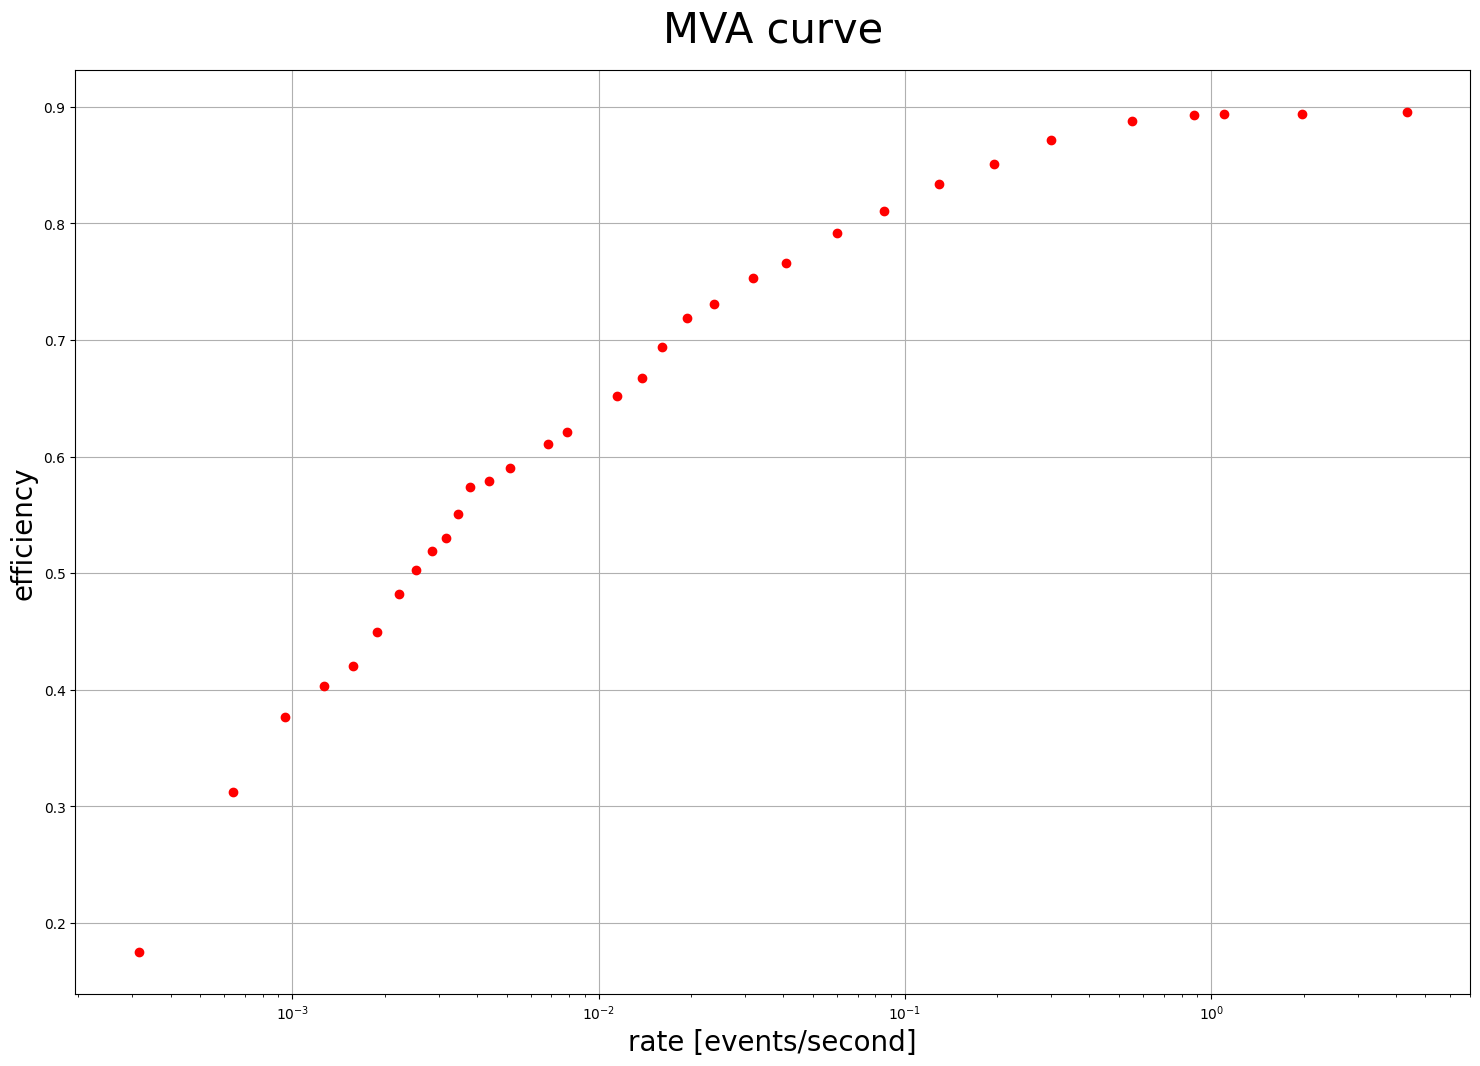

In [2]:
rate, efficiency = np.loadtxt("MVA-points.txt", unpack = True)
#rate = rate [::2]
#efficiency = efficiency[::2]
print(rate)

plt.figure(24523, figsize = (18,12))
plt.title("MVA curve", fontsize = 30)
plt.xscale('log')
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel("efficiency", fontsize = 20)
plt.grid()
plt.errorbar(rate, efficiency, linestyle = '', marker = '.', color = 'red', markersize = 12)

## GENERATE THE DATA

In [4]:
# DATA GENERATION
simulationCPP = "LoopLineShape"
mvaScan = "\"true\""
ConfFile = "\"ToyConfiguration.txt\""
Nfiles = "300"
Upfolder = "folder/"

def replace_line(file_name, line_num, text):
    lines = open(file_name, 'r').readlines()
    lines[line_num] = text
    out = open(file_name, 'w')
    out.writelines(lines)
    out.close()

def generate(i):
    Cosmicrate = str(rate[i])
    Efficiency = str(efficiency[i])
    folder = Upfolder + "mva_" + str(i)
    if not os.path.exists(folder):	# Check if the folder exist
        os.makedirs(folder)	# Create the folder
    print(i)
    ROOT.LoopLineShape(int(Nfiles),folder + "/","true", rate[i], efficiency[i],"ToyConfiguration.txt")
    os.popen("cp ToyConfiguration.txt " + folder + "/"  + "ToyConfiguration.txt")	

# Paraller generation of the data
njob = 9
indexes = range(0,len(rate))
for i in range(0, int(len(rate)/njob)):
    #Create list of point to be generated
    start = i*njob
    stop = (i+1)*njob
    index = np.asarray(indexes[start:stop])
    print("Generating MVA points: ", index)
    if __name__ == "__main__":
        # Generate Files
        with Pool(processes = njob, maxtasksperchild = 1) as pool:
            pool.map(generate, index)
    # Create list of last points to be generated
    if (i == (int(len(rate)/njob) - 1) and (len(rate))%njob != 0):
        start = (i+1)*njob
        stop = start + len(rate)%njob
        index = np.asarray(indexes[start:stop])
        print("generating last points: " , index)
        # Generate last points
        if __name__ == "__main__":
            with Pool(processes = njob, maxtasksperchild = 1) as pool:
                pool.map(generate, index)

for i in range(0,len(rate)):
    folder = "mva_" + str(i)
    replace_line(Upfolder + folder + "/ToyConfiguration.txt", 23, "Cosmicrate = %f\n" % (rate[i]))
    replace_line(Upfolder + folder + "/ToyConfiguration.txt", 24, "Efficiency = %f\n" % (efficiency[i]))

Generating MVA points:  [0 1 2 3 4 5 6 7 8]
132056487








Generating MVA points:  [ 9 10 11 12 13 14 15 16 17]
129101314151617







11
Generating MVA points:  [18 19 20 21 22 23 24 25 26]
231922201821
24
25
26





generating last points:  [27 28 29 30 31 32]
273029322831







Nstack        20
NHbar         20.58
Repetition    5
TimeStep      8
SweepStep     100
TotalStep     50
BinBefore     3
FrequencyStep 5
Efficiency    0.68
CosmicRate    0.046
cb_start    0
cb_end      145
cb_peak     45
da_start    1.42e+06
da_peak     1.42004e+06
da_end      1.42014e+06
C             0.5
pwall_ad      1
pwall_cb      1
delay         6.90618e-310
Bdrift        0
Cruijff Paramters		
x0_cb     9.88131e-323
sigma0_cb	8.76
sigma1_cbì 38.55
k0_cb      0.23
k1_cb      0.02
Norm_cb    274.22
sigma0_da  8.76
sigma1_da  38.55
k0_da      0.23
k1_da      0.02
Norm_da    274.22




Nstack        20
NHbar         20.58
Repetition    5
TimeStep      8
SweepStep     100
TotalStep     50
BinBefore     3


## ANALYZE THE DATA

### ROC parameter optimization

#### Number of trials to be analyzed

In [25]:
Ntrial = 100 # Number of trial to be analyzed
folder = "scanMvaData/mva_" # Data directory

#### Ensamble of parameter for the optimization

In [26]:
#Parameters of the algorithms
# initialize lists

#Nfilter = [4,5,6,7,8,9,10, 11, 12, 13]
Nfilter = [1,2,3,4,5,6,7,8,9,10, 11, 12, 13]
#Nsigma = [5/2, 3, 7/2, 4, 4 + 1/2, 5]
Nsigma = [4 + 1/2]
#fraction = [ 15/100 , 20/100 , 25/100, 30/100, 35/100, 40/100]
fraction = [35/100]
Nthr = [2,3,4,5,6,7,8,9,10,11]
Nthr1 = [3,4,5,6,7,8,9,10,12,13]
Nthr2 = [3,4,5,6,7,8]
'''

Nfilter = [6,7,8,9,10]
Nsigma = [4, 4 + 1/2, 5]
fraction = [ 15/100 , 20/100 , 25/100, 30/100]
Nthr = [5,6,7,8,9]
Nthr1 = [6,7,8,9,10]
Nthr2 = [4,5,6,7,8]'''

'\n\nNfilter = [6,7,8,9,10]\nNsigma = [4, 4 + 1/2, 5]\nfraction = [ 15/100 , 20/100 , 25/100, 30/100]\nNthr = [5,6,7,8,9]\nNthr1 = [6,7,8,9,10]\nNthr2 = [4,5,6,7,8]'

In [27]:
# import itertools package
from itertools import product # package for generating the combination of parameters

for i in range(0, len(rate)):
    folder2 = "Plot/mva_" + str(i)
    if not os.path.exists(folder2):	# Check if the folder exist
        os.makedirs(folder2)	# Create the folder

combinations = list(product(Nfilter, Nsigma))     # Combination of Nfilter and Nsigma
print("list of combination: ", type(combinations))
combinations = list(map(list, combinations))      # Convert to list

combthrs = list(product(Nthr1, Nthr2)) # Combination of Threshold 1 and threshold 2
print("list of combination: ", type(combthrs))
combthrs = list(map(list, combthrs))   # Convert to list

for i,item in enumerate(combinations): # Add other parameter
    index = i%len(fraction) 
    combinations[i].append(fraction[index])  # add fraction values to list of parameters
    index = i%len(Nthr)
    combinations[i].append(Nthr[index])      # add treshold for single threshold parameter
    combinations[i].append(combthrs[i][0])   # add thr1 and thr2 to list of combinations
    combinations[i].append(combthrs[i][1])   # thr2

print("combinations: [Nfilter, Nsigma, fraction, Nthr, Nthr1, Nthr2]")
print("Number of Combinations: ", len(combinations))
print("Combinations: ", combinations[:6])

index = range(0,len(rate)) # index of the MVA scan
#index = index[::2]


# Create matrix to store the values of the optimization
# first index is the combination, second index MVA point
# standard deviation
ROC_stdSum = [] 
ROC_stdSign = [] 
ROC_stdCf  = []
ROC_stdThr = []
ROC_stdVeto= []
ROC_stdRev = []
# bias
ROC_biasSum = []
ROC_biasSign = []
ROC_biasCf  = []
ROC_biasThr = []
ROC_biasVeto= []
ROC_biasRev = []
#Covariance
ROC_covSum = [] 
ROC_covSign = [] 
ROC_covCf  = []
ROC_covThr = []
ROC_covVeto= []
ROC_covRev = []
#sigma
ROC_sigmaSum = [] 
ROC_sigmaSign = [] 
ROC_sigmaCf  = []
ROC_sigmaThr = []
ROC_sigmaVeto= []
ROC_sigmaRev = []
# Mctruth
ROC_mctruth = []

list of combination:  <class 'list'>
list of combination:  <class 'list'>
combinations: [Nfilter, Nsigma, fraction, Nthr, Nthr1, Nthr2]
Number of Combinations:  13
Combinations:  [[1, 4.5, 0.35, 2, 3, 3], [2, 4.5, 0.35, 3, 3, 4], [3, 4.5, 0.35, 4, 3, 5], [4, 4.5, 0.35, 5, 3, 6], [5, 4.5, 0.35, 6, 3, 7], [6, 4.5, 0.35, 7, 3, 8]]


# START THE OPTIMIZATION

In [28]:
# analysis task to be runned in parallel
def task(i):
    values = ROOT.ParamOptimization(folder + str(i) + "/", folder +  str(i) + "/ToyConfiguration.txt", Ntrial, Nfilter, fraction, Nsigma, Nthr, Nthr1, Nthr2, "Plot/mva_" + str(i) + "/")
    npResult = np.asarray(values)
    return npResult

for j,item in enumerate(combinations): # For each combination, perform the MVA scan
    # Update the parameters
    Nfilter = item[0]
    Nsigma  = item[1]
    fraction = item[2]
    Nthr = item[3]
    Nthr1 = item[4]
    Nthr2 = item[5]
    
    #Initialize the array
    # all the algorithms are with background subtraction
    sigma_MCtruth = []
    # Sum Neighbors 
    bias_sum = []
    devStandard_sum = []
    onset_sum = []
    onset2_sum = []
    cov_sum = []
    sigma_sum = []
    # Significance
    bias_sign = []
    devStandard_sign = []
    onset_sign = []
    onset2_sign = []
    cov_sign = []
    sigma_sign = []
    # Reversed 2017
    bias_rev = []
    devStandard_rev = []
    onset_rev = []
    onset2_rev = []
    cov_rev = []
    sigma_rev = []
    # forward 2017
    bias_fw = []
    devStandard_fw = []
    onset_fw = []
    onset2_fw = []
    cov_fw = []
    sigma_fw = []
    # Constant Fraction
    bias_cf = []
    devStandard_cf = []
    onset_cf = []
    onset2_cf = []
    cov_cf = []
    sigma_cf = []
    # Threshold
    bias_thr = []
    devStandard_thr = []
    onset_thr = []
    onset2_thr = []
    cov_thr = []
    sigma_thr = []
    
    start = time.time() # start time measurement
    # go parallel!
    if __name__ == "__main__":
        # create the process pool
        with Pool(processes = 11, maxtasksperchild = 1) as pool: # number of core to be used in the parallel analysis, max process for each core always equal to 1 to avoid memory leak
            for results in pool.map(task, index):
                # append th results to the arrays
                bias_thr.append(results[0]);   devStandard_thr.append(results[1])
                bias_fw .append(results[2]);   devStandard_fw .append(results[3])
                bias_rev.append (results[4]);  devStandard_rev.append(results[5])
                bias_cf .append (results[6]);  devStandard_cf .append(results[7])
                bias_sum.append(results[8]);   devStandard_sum.append(results[9])
                bias_sign.append(results[10]); devStandard_sign.append(results[11])
                sigma_thr.append(results[12]);   cov_thr.append(results[13])
                sigma_fw .append(results[14]);   cov_fw .append(results[15])
                sigma_rev.append (results[16]);  cov_rev.append(results[17])
                sigma_cf .append (results[18]);  cov_cf .append(results[19])
                sigma_sum.append(results[20]);   cov_sum.append(results[21])
                sigma_sign.append(results[22]);  cov_sign.append(results[23])
                sigma_MCtruth.append(results[24])

            print("combination: %d° " %j, item)
            # save the  results in the ROC matrices for the later analysis
            # standard deviation of (onset2 - onset1) measured - MCtruch
            ROC_stdSum.append(devStandard_sum)
            ROC_stdSign.append(devStandard_sign)
            ROC_stdCf.append(devStandard_cf)
            ROC_stdThr.append(devStandard_thr)
            ROC_stdVeto.append(devStandard_fw)
            ROC_stdRev.append(devStandard_rev)
            # bias of (onset2 - onset1) measured - MCtruth
            ROC_biasSum.append(bias_sum)
            ROC_biasSign.append(bias_sign)
            ROC_biasCf.append(bias_cf)
            ROC_biasThr.append(bias_thr)
            ROC_biasVeto.append(bias_fw)
            ROC_biasRev.append(bias_rev)
            # covariance
            ROC_covSum.append(cov_sum)
            ROC_covSign.append(cov_sign)
            ROC_covCf.append(cov_cf)
            ROC_covThr.append(cov_thr)
            ROC_covVeto.append(cov_fw)
            ROC_covRev.append(cov_rev)
            # sigma
            ROC_sigmaSum.append(sigma_sum)
            ROC_sigmaSign.append(sigma_sign)
            ROC_sigmaCf.append(sigma_cf)
            ROC_sigmaThr.append(sigma_thr)
            ROC_sigmaVeto.append(sigma_fw)
            ROC_sigmaRev.append(sigma_rev)
            #MCtruth
            ROC_mctruth.append(sigma_MCtruth)
    end = time.time()
    print("    Time for one configuration: %.2f seconds" % (end - start), " time needed: %.2f minutes / %.2f hours" %  ( ((end - start)*(len(combinations) - j)/60), ((end - start)*(len(combinations) - j)/3600) ) )

print("ROC SCAN DONE")
print("GOODCOFFE")

combination: 0°  [1, 4.5, 0.35, 2, 3, 3]
    Time for one configuration: 140.90 seconds  time needed: 30.53 minutes / 0.51 hours
combination: 1°  [2, 4.5, 0.35, 3, 3, 4]
    Time for one configuration: 132.35 seconds  time needed: 26.47 minutes / 0.44 hours
combination: 2°  [3, 4.5, 0.35, 4, 3, 5]
    Time for one configuration: 132.68 seconds  time needed: 24.33 minutes / 0.41 hours
combination: 3°  [4, 4.5, 0.35, 5, 3, 6]
    Time for one configuration: 133.54 seconds  time needed: 22.26 minutes / 0.37 hours
combination: 4°  [5, 4.5, 0.35, 6, 3, 7]
    Time for one configuration: 133.55 seconds  time needed: 20.03 minutes / 0.33 hours
combination: 5°  [6, 4.5, 0.35, 7, 3, 8]
    Time for one configuration: 133.59 seconds  time needed: 17.81 minutes / 0.30 hours
combination: 6°  [7, 4.5, 0.35, 8, 4, 3]
    Time for one configuration: 131.79 seconds  time needed: 15.38 minutes / 0.26 hours
combination: 7°  [8, 4.5, 0.35, 9, 4, 4]
    Time for one configuration: 131.78 seconds  time nee

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



#### Convert list to numpy array

In [34]:
ROC_stdSum = np.asarray(ROC_stdSum)
ROC_stdSign = np.asarray(ROC_stdSign)
ROC_stdCf  = np.asarray(ROC_stdCf)
ROC_stdThr = np.asarray(ROC_stdThr)
ROC_stdVeto= np.asarray(ROC_stdVeto)
ROC_stdRev = np.asarray(ROC_stdRev)
# bias
ROC_biasSum = np.asarray(ROC_biasSum)
ROC_biasSign = np.asarray(ROC_biasSign)
ROC_biasCf  = np.asarray(ROC_biasCf)
ROC_biasThr = np.asarray(ROC_biasThr)
ROC_biasVeto= np.asarray(ROC_biasVeto)
ROC_biasRev = np.asarray(ROC_biasRev)
# covariance
ROC_covSum = np.asarray(ROC_covSum)
ROC_covSign = np.asarray(ROC_covSign)
ROC_covCf  = np.asarray(ROC_covCf)
ROC_covThr = np.asarray(ROC_covThr)
ROC_covVeto= np.asarray(ROC_covVeto)
ROC_covRev = np.asarray(ROC_covRev)
# sigma
ROC_sigmaSum = np.asarray(ROC_sigmaSum)
ROC_sigmaSign = np.asarray(ROC_sigmaSign)
ROC_sigmaCf  = np.asarray(ROC_sigmaCf)
ROC_sigmaThr = np.asarray(ROC_sigmaThr)
ROC_sigmaVeto= np.asarray(ROC_sigmaVeto)
ROC_sigmaRev = np.asarray(ROC_sigmaRev)

# PASSCUT ANALYSIS

In [30]:
PassCutrate = 0.046
Nfilter = [1,2,3,4,5,6,7,8,9,10, 11, 12, 13]
Nsigma = [4 + 1/2]
fraction = [35/100]
Nthr = [2,3,4,5,6,7,8,9]
Nthr1 = [3,4,5,6,7,8,9,10,11,12]
Nthr2 = [3,4,5,6,7,8]

combPass = list(product(Nfilter, Nsigma))     # Combination of Nfilter and Nsigma
print("list of combination: ", type(combPass))
combPass = list(map(list, combPass))      # Convert to list

combthrsPass = list(product(Nthr1, Nthr2)) # Combination of Threshold 1 and threshold 2
print("list of combination: ", type(combthrs))
combthrsPass = list(map(list, combthrsPass))   # Convert to list

for i,item in enumerate(combPass): # Add other parameter
    index = i%len(fraction) 
    combPass[i].append(fraction[index])  # add fraction values to list of parameters
    index = i%len(Nthr)
    combPass[i].append(Nthr[index])      # add treshold for single threshold parameter
    combPass[i].append(combthrsPass[i][0])   # add thr1 and thr2 to list of combinations
    combPass[i].append(combthrsPass[i][1])   # thr2


PassCutResults = []
Ntrial_pass = 1000
def task(i):
    Nfilter = combPass[i][0]
    fraction =  combPass[i][2]
    Nsigma =  combPass[i][1]
    Nthr =  combPass[i][3]
    Nthr1 =  combPass[i][4]
    Nthr2 =  combPass[i][5]
    PassCut = ROOT.ParamOptimization("PassCut/","PassCut/ToyConfiguration.txt", Ntrial_pass, Nfilter, fraction, Nsigma, Nthr, Nthr1, Nthr2, "Plot/mva_" + str(i) + "/")
    npResult = np.asarray(PassCut)
    return npResult

# go parallel!
if __name__ == "__main__":
    # create the process pool
    index = range(0, len(combPass))
    with Pool(processes = 11, maxtasksperchild = 1) as pool: # number of core to be used in the parallel analysis, max process for each core always equal to 1 to avoid memory leak
        for results in pool.map(task, index):
          PassCutResults.append(results)

list of combination:  <class 'list'>
list of combination:  <class 'list'>


Nstack        20
NHbar         20.58
Repetition    5
TimeStep      8
SweepStep     24
TotalStep     50
BinBefore     3
FrequencyStep 5
Efficiency    0.55
CosmicRate    0.046
x_cb_start    175
x_cb_end      320
x_cb_peak     220
x_da_start    1.42018e+06
x_da_peak     1.42022e+06
x_da_end      1.42032e+06
C             0.5
pwall_ad      1
pwall_cb      1
delay         2.5
Bdrift        0
Cruijff Paramters		
x0_cb     220.65
sigma0_cb	8.76
sigma1_cbì 38.55
k0_cb      0.23
k1_cb      0.02
Norm_cb    274.22
sigma0_da  8.76
sigma1_da  38.55
k0_da      0.23
k1_da      0.02
Norm_da    274.22




Nstack        20
NHbar         20.58
Repetition    5
TimeStep      8
SweepStep     24
TotalStep     50
BinBefore     3
FrequencyStep 5
Efficiency    0.55
CosmicRate    0.046
x_cb_start    175
x_cb_end      320
x_cb_peak     220
x_da_start    1.42018e+06
x_da_peak     1.42022e+06
x_da_end      1.42032e+06
C             0.5
pwal

In [31]:
PassCutResults

[array([ 0.43367602, 13.39197913, -0.71632398,  6.80185065,  0.48367602,
         7.95231562, -0.21632398,  7.53103353, 10.98367602, 11.29442001,
        10.98367602, 11.29442001, 17.80782656,  0.65302377, 13.3753127 ,
         0.85259119, 13.28590048,  0.79447171, 13.25964486,  0.8153011 ,
         0.        ,  0.        ,  0.        ,  0.        , 11.29442001]),
 array([-0.41632398,  9.75830876, -0.06632398,  6.40430424, -0.31632398,
         7.49015309,  0.08367602,  5.52501327,  9.68367602, 14.34314146,
         9.68367602, 14.34314146, 15.11036837,  0.75604018, 13.16743381,
         0.8651606 , 13.23104705,  0.81658796, 12.13101876,  0.88224506,
        10.72192128,  0.15041483, 10.72192128,  0.15041483, 11.29442001]),
 array([-6.63239774e-02,  6.86037980e+00, -1.66323977e-01,  6.72936488e+00,
        -7.16323977e-01,  7.46569351e+00, -1.63239774e-02,  5.52727548e+00,
         2.93367602e+00,  3.57428166e+01,  2.93367602e+00,  3.57428166e+01,
         1.26988228e+01,  8.34374139e-

## VARIANCE + BIAS COST FUNCTION

In [32]:
# Cost functions
def costFunction(x,y):
    return np.sqrt(x**2 + y**2)

ROC_cost_cf = costFunction(ROC_stdCf,ROC_biasCf)
ROC_cost_thr = costFunction(ROC_stdThr,ROC_biasThr)
ROC_cost_veto = costFunction(ROC_stdVeto,ROC_biasVeto) 
ROC_cost_rev = costFunction(ROC_stdRev,ROC_biasRev)
ROC_cost_sum = costFunction(ROC_stdSum,ROC_biasSum)
ROC_cost_sign = costFunction(ROC_stdSign,ROC_biasSign)

constant fraction:       (10, 11)  combination: [11, 4.5, 0.35, 2, 4, 7]
significance :           (8, 18)  combination: [9, 4.5, 0.35, 10, 4, 5]
significance  with mod:  (8, 18)  combination: [9, 4.5, 0.35, 10, 4, 5]
Reversed:                (9, 17)  combination: [10, 4.5, 0.35, 11, 4, 6]
Threshold:               (6, 24)  combination: [7, 4.5, 0.35, 8, 4, 3]
Forward:                 (2, 18)  combination: [3, 4.5, 0.35, 4, 3, 5]


best combination for each point:
t-student: best at each point:  [ 0 11 11 11 10  9 10 10 10 10  9  9  9 10 10  9 10 10  8 10  9  6  8  9
  7  9 10  7  5  5  4  3  0]


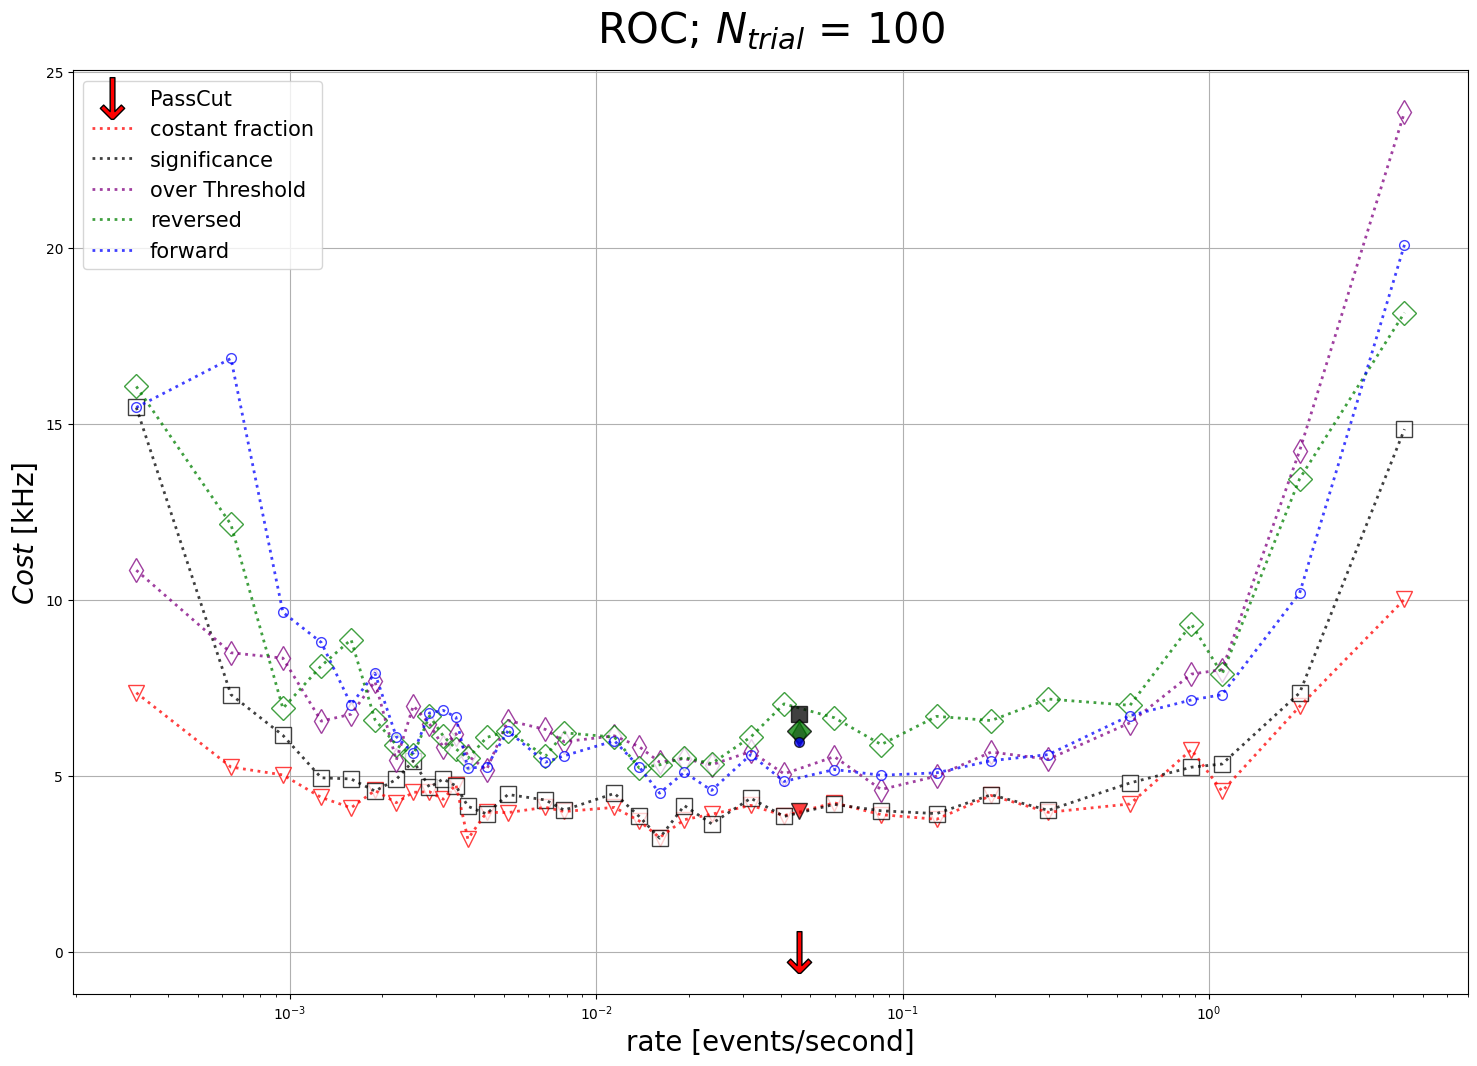

In [33]:
import matplotlib._color_data as mcd # package for colors

# list of colors for each combinations of parameters
overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}
overlap = list(overlap)
overlap = sorted(overlap, reverse=True)

# Find best configuration which minimize the cost
ind = np.unravel_index(np.argmin(ROC_cost_cf, axis = None), ROC_cost_cf.shape)
print("constant fraction:      ", ind, " combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_sum, axis = None), ROC_cost_sum.shape)
print("significance :          ", ind, " combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_sign, axis = None), ROC_cost_sign.shape)
print("significance  with mod: ", ind, " combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_rev, axis = None), ROC_cost_rev.shape)
print("Reversed:               ", ind, " combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_thr, axis = None), ROC_cost_thr.shape)
print("Threshold:              ", ind, " combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_veto, axis = None), ROC_cost_veto.shape)
print("Forward:                ", ind, " combination:", combinations[ind[0]])

# Find the best configuration of each algorithm with respect to each MVA points
# CONSTANT FRACTION
minimaInd_cf = np.argmin(ROC_cost_cf, axis = 0)
best_cf = np.zeros(len(rate))
# significance  TEST
minimaInd_sum = np.argmin(ROC_cost_sum, axis = 0)
best_sum = np.zeros(len(rate))
# SIGNIFICANCE
minimaInd_sign = np.argmin(ROC_cost_sign, axis = 0)
best_sign = np.zeros(len(rate))
# THRESHOLD
minimaInd_thr = np.argmin(ROC_cost_thr, axis = 0)
best_thr = np.zeros(len(rate))
# REVERSED
minimaInd_rev = np.argmin(ROC_cost_rev, axis = 0)
best_rev = np.zeros(len(rate))
# FORWARD
minimaInd_veto = np.argmin(ROC_cost_veto, axis = 0)
best_veto = np.zeros(len(rate))

print("\n")
print("best combination for each point:")
print("t-student: best at each point: ", minimaInd_sum)

# Plot of the best configuration for each point
plt.figure(0,figsize = (18,12))

for i,item in enumerate(rate): # Loop on each MVA point
    # constant fraction
    index = minimaInd_cf[i]
    best_cf[i] = ROC_cost_cf[index][i]
    plt.errorbar(item, best_cf[i], linestyle = '', markersize = 12, marker = "v", color = "white",markeredgecolor='red', alpha = 0.75)
    #print("MVA point %d" % i, "combination: ",  index)
    # t-student
    index = minimaInd_sum[i]
    best_sum[i] = ROC_cost_sum[index][i]
    plt.errorbar(item, best_sum[i], linestyle = '',marker = "s", markersize = 12, color = "white", markeredgecolor='black', alpha = 0.75)
    # threshold
    index = minimaInd_thr[i]
    best_thr[i] = ROC_cost_thr[index][i]
    plt.errorbar(item, best_thr[i], linestyle = '',marker = "d", markersize = 12, color = "white", markeredgecolor='purple', alpha = 0.75)
    # reversed
    index = minimaInd_rev[i]
    best_rev[i] = ROC_cost_rev[index][i]
    plt.errorbar(item, best_rev[i], linestyle = '',marker = "D", markersize =12, color = "white", markeredgecolor='green', alpha = 0.75)
    # forward
    index = minimaInd_veto[i]
    best_veto[i] = ROC_cost_veto[index][i]
    plt.errorbar(item, best_veto[i], linestyle = '',marker = ".", markersize = 14, color = "white", markeredgecolor='blue', alpha = 0.75)

plt.title("ROC; " + r"$N_{trial}$ = " + str(Ntrial) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$Cost$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.ylim(-2.5,22.5)
plt.plot(0.046, 0, color = "red", linestyle = '', marker=r'$\downarrow$', markersize = 30, markeredgecolor='black', label = "PassCut", alpha = 1)
plt.errorbar(rate, best_cf , linestyle = 'dotted', color = "red", label = "costant fraction", linewidth = 2 ,alpha = 0.75)
plt.errorbar(rate, best_sum, linestyle = 'dotted', color = "black", label = r"significance",linewidth = 2 , alpha = 0.75)
plt.errorbar(rate, best_thr, linestyle = 'dotted', color = "purple", label = "over Threshold", linewidth = 2 ,alpha = 0.75)
plt.errorbar(rate, best_rev, linestyle = 'dotted', color = "green", label = "reversed", linewidth = 2 ,alpha = 0.75)
plt.errorbar(rate, best_veto, linestyle = 'dotted', color = "blue", label = "forward", linewidth = 2 ,alpha = 0.75)

# PASSCUT
variance = np.asarray([x[6] for x in PassCutResults])
bias =  np.asarray([x[7] for x in PassCutResults])
point = costFunction(variance, bias)
minimaPass = np.argmin(point)
plt.errorbar(PassCutrate, point[minimaPass], linestyle = '', markersize = 12, marker = "v", color = "red",markeredgecolor='black', alpha = 0.75)
# significance
variance =  np.asarray([x[9] for x in PassCutResults])
bias =  np.asarray([x[9] for x in PassCutResults])
point = costFunction(variance, bias)
minimaPass = np.argmin(point)
plt.errorbar(PassCutrate, point[minimaPass], linestyle = '',marker = "s", markersize = 12, color = "black", markeredgecolor='black', alpha = 0.75)
# threshold
variance =  np.asarray([x[0] for x in PassCutResults])
bias =  np.asarray([x[1] for x in PassCutResults])
point = costFunction(variance, bias)
minimaPass = np.argmin(point)
plt.errorbar(PassCutrate, point[minimaPass], linestyle = '',marker = "d", markersize = 12, color = "purple", markeredgecolor='black', alpha = 0.75)
# reverse
variance =  np.asarray([x[4] for x in PassCutResults])
bias =  np.asarray([x[5] for x in PassCutResults])
point = costFunction(variance, bias)
minimaPass = np.argmin(point)
plt.errorbar(PassCutrate, point[minimaPass], linestyle = '',marker = "D", markersize =12, color = "green", markeredgecolor='black', alpha = 0.75)
# forward
variance =  np.asarray([x[2] for x in PassCutResults])
bias =  np.asarray([x[3] for x in PassCutResults])
point = costFunction(variance, bias)
minimaPass = np.argmin(point)
plt.errorbar(PassCutrate, point[minimaPass], linestyle = '',marker = ".", markersize = 14, color = "blue", markeredgecolor='black', alpha = 0.75)

plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/ROC_variance_bias.jpg", bbox_inches = "tight", format = "jpg")
plt.savefig("Plot/mvaScan/ROC_variance_bias.pdf", format = "pdf")

## Tutte le combinazioni insieme

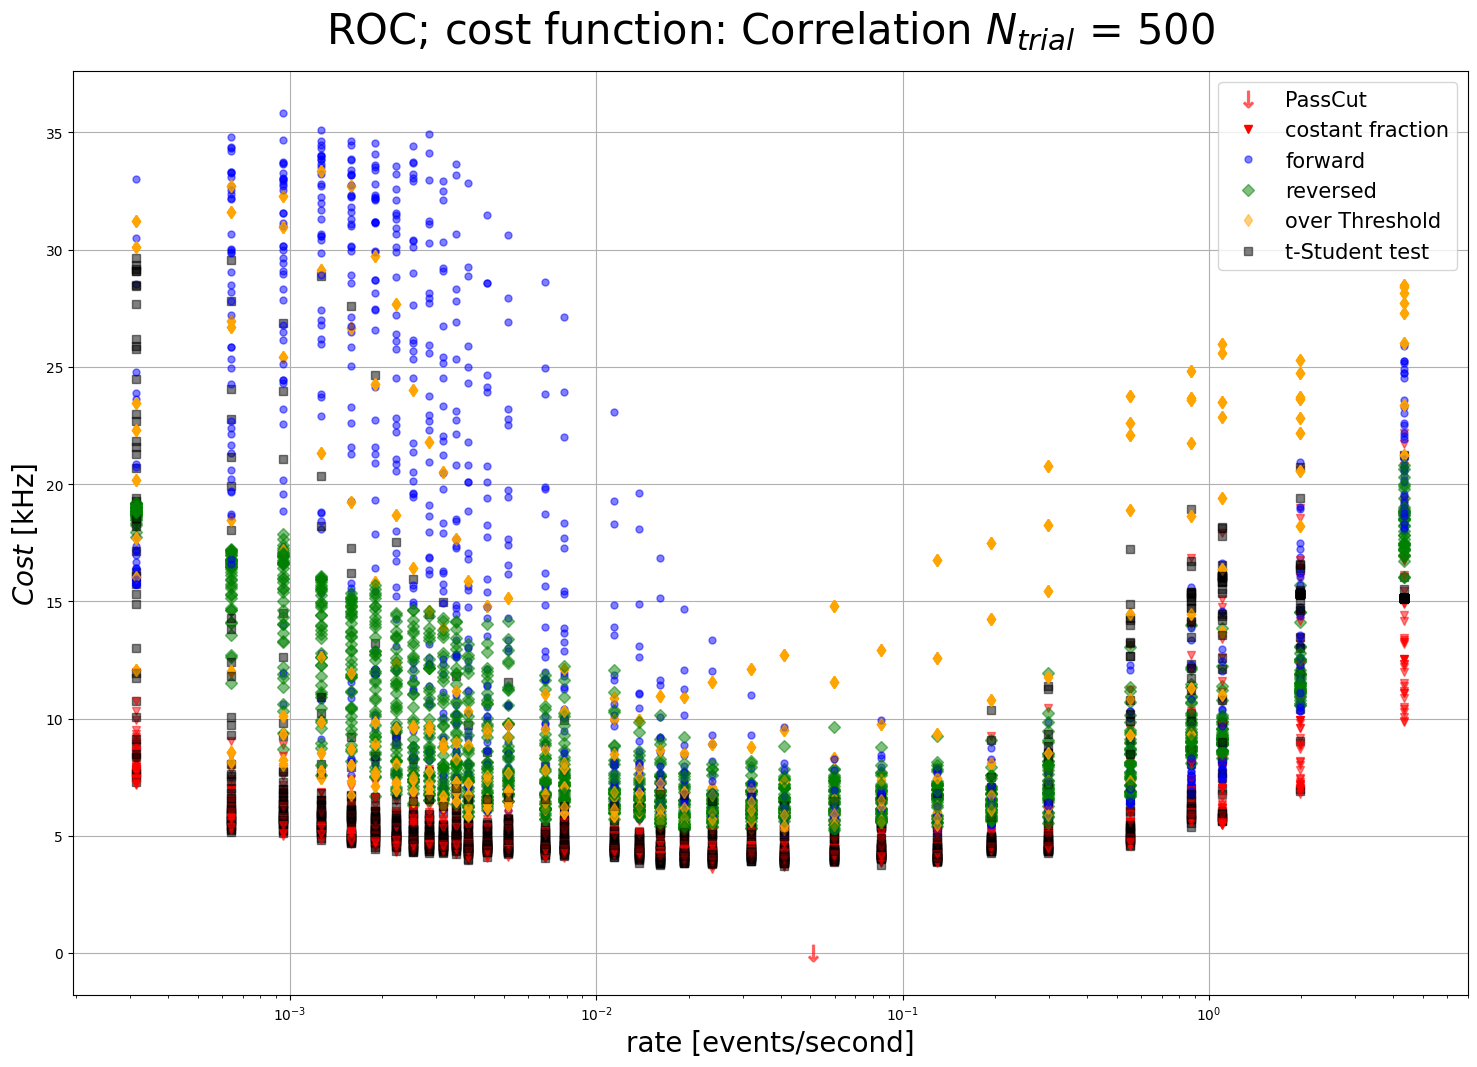

In [18]:
# SIGMA VERSUS rate
######################################################

plt.figure(0, figsize = (18,12))
plt.title("ROC; cost function: Correlation " + r"$N_{trial}$ = " + str(Ntrial) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$Cost$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.yticks(np.linspace(0,45,19))
#plt.yticks(np.linspace(-5,40,19))
#plt.ylim(0,20)
plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$\downarrow$', markersize = 12, label = "PassCut", alpha = 0.5)

for i in range(0, len(combinations)):
    if(i == 31):
        plt.errorbar(rate, ROC_cost_cf[i], linestyle = '', marker = "v", color = "red", label = "costant fraction", alpha = 1, linewidth = 1.5)
        plt.errorbar(rate, ROC_cost_veto[i], linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.5)
        plt.errorbar(rate, ROC_cost_rev[i], linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.5)
        plt.errorbar(rate, ROC_cost_thr[i], linestyle = '',marker = "d", color = "orange", label = "over Threshold", alpha = 0.5)
        plt.errorbar(rate, ROC_cost_sum[i], linestyle = '',marker = "s", color = "black", label = r"t-Student test", alpha = 0.5)
    else:
        plt.errorbar(rate, ROC_cost_cf[i], linestyle = '', marker = "v", color = "red",   alpha = 0.5)
        plt.errorbar(rate, ROC_cost_veto[i], linestyle = '',marker = ".", color = "blue", markersize = 10, alpha = 0.5)
        plt.errorbar(rate, ROC_cost_rev[i], linestyle = '',marker = "D", color = "green", alpha = 0.5)
        plt.errorbar(rate, ROC_cost_thr[i], linestyle = '',marker = "d", color = "orange", alpha = 0.5)
        plt.errorbar(rate, ROC_cost_sum[i], linestyle = '',marker = "s", color = "black", alpha = 0.5)

plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/ROC_all_biasVariance.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/ROC_all_biasVariance.pdf", format = "pdf")

### look at the sigma: (ONSET_2 - ONSET_1)

minimaInd_sum_sigma [ 5 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
 36 36 36 36 36 36 24 12  0]
significance :  (39, 22)
combination: [10, 4, 0.3, 9, 9, 6]


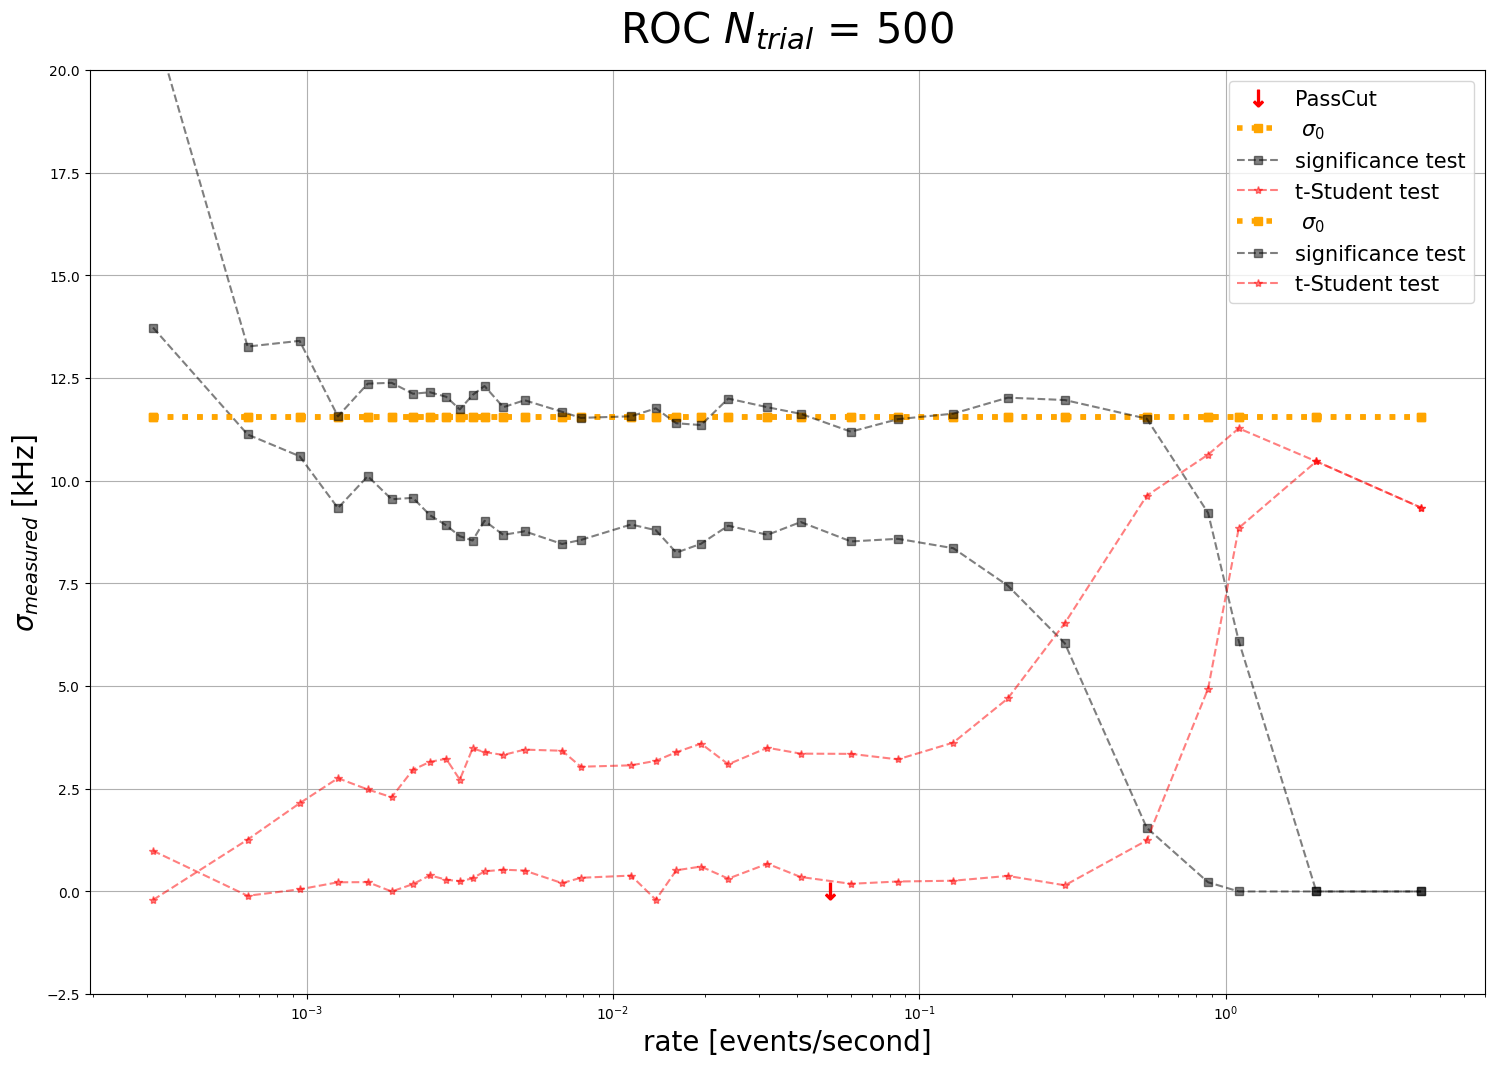

In [19]:
# significance  TEST
minimaInd_sum_sigma = np.argmin(ROC_sigmaSum, axis = 0)
print("minimaInd_sum_sigma", minimaInd_sum_sigma)
# Cost function
ind = np.unravel_index(np.argmin(ROC_cost_sum, axis = None), ROC_cost_sum.shape)
print("significance : ", ind)
print("combination:", combinations[ind[0]])

# SIGMA MEASURED: (ONSET_2 - ONSET_1)
plt.figure(65, figsize = (18,12))
plt.title("ROC " + r"$N_{trial}$ = " + str(Ntrial) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$\sigma_{measured}$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.yticks(np.linspace(0,45,19))
#plt.yticks(np.linspace(-5,40,19))
plt.ylim(-2.5,20)
plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$\downarrow$', markersize = 12, label = "PassCut", alpha = 1)

for i in range(0, len(combinations)):
    if(i == ind[0]):
        plt.errorbar(rate, np.ones(len(rate))*(40/np.sqrt(12)), linestyle = "dotted", marker = "s", color = "orange", linewidth = 4 ,label = r" $\sigma_{0}$")
        #plt.errorbar(rate, ROC_sigmaCf[i], linestyle = '', marker = "v", color = "red", label = "costant fraction", alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaVeto[i], linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaRev[i], linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaThr[i], linestyle = '',marker = "d", color = "orange", label = "over Threshold", alpha = 0.5)
        plt.errorbar(rate, ROC_sigmaSum[i], linestyle = '--',marker = "s", color = "black", label = r"significance test", alpha = 0.5)
        plt.errorbar(rate, ROC_biasSum[i], linestyle = '--',marker = "*", color = "red", label = r"t-Student test", alpha = 0.5)
    if(i == minimaInd_sum_sigma[13]):
        plt.errorbar(rate, np.ones(len(rate))*(40/np.sqrt(12)), linestyle = "dotted", marker = "s", color = "orange", linewidth = 4 ,label = r" $\sigma_{0}$")
        #plt.errorbar(rate, ROC_sigmaCf[i], linestyle = '', marker = "v", color = "red", label = "costant fraction", alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaVeto[i], linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaRev[i], linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaThr[i], linestyle = '',marker = "d", color = "orange", label = "over Threshold", alpha = 0.5)
        plt.errorbar(rate, ROC_sigmaSum[i], linestyle = '--',marker = "s", color = "black", label = r"significance test", alpha = 0.5)
        plt.errorbar(rate, ROC_biasSum[i], linestyle = '--',marker = "*", color = "red", label = r"t-Student test", alpha = 0.5)
    elif(0):
        plt.errorbar(rate, ROC_sigmaSum[i], linestyle = '',marker = "s", color = "black",  alpha = 0.5)
        plt.errorbar(rate, ROC_biasSum[i], linestyle = '',marker = "*", color = "red",  alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaSum[i], linestyle = '--',marker = "*", color = "black",  alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaCf[i], linestyle = '', marker = "v", color = "red",   alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaVeto[i], linestyle = '',marker = ".", color = "blue",  markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaRev[i], linestyle = '',marker = "D", color = "green",  alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaThr[i], linestyle = '',marker = "d", color = "orange", alpha = 0.5)
        
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/ROC_Sigma_Algorithm_sum.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/ROC_Sigma_Algorithm_sum.pdf", format = "pdf")

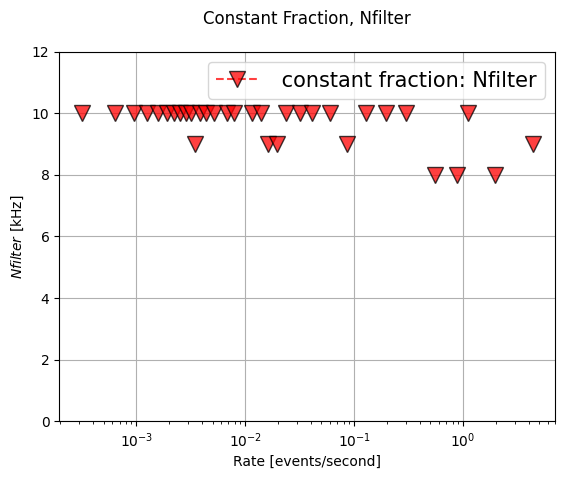

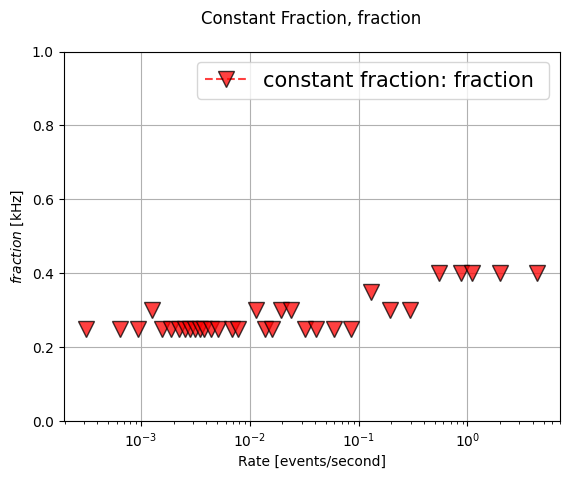

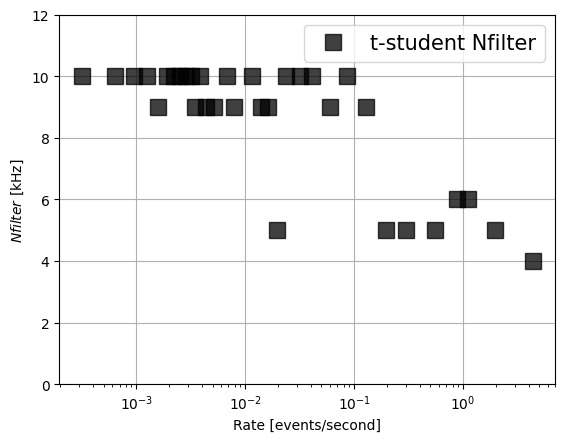

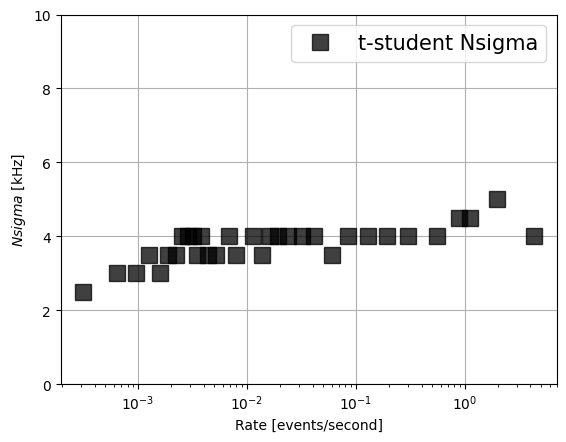

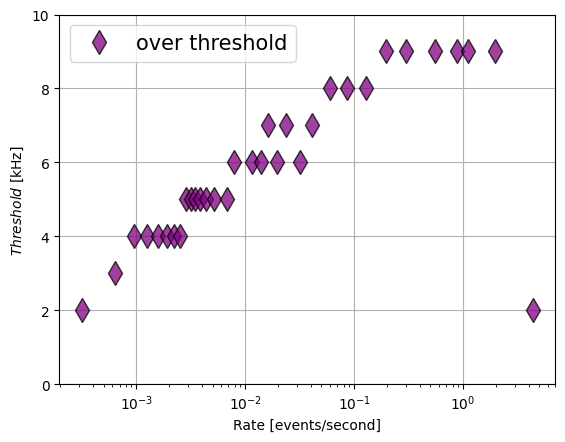

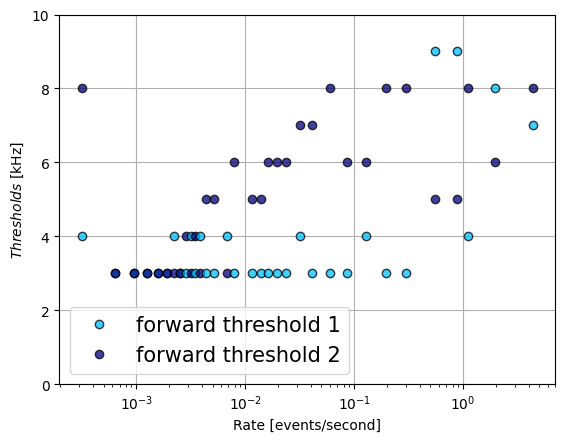

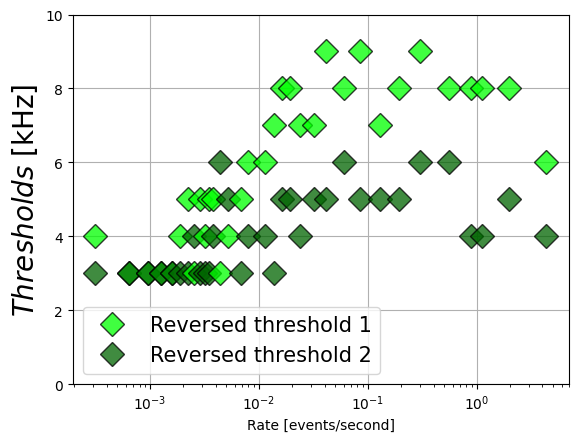

In [20]:
# Plots of the Best Parameters versus MVA points
# constant fraction, Nfilter
plt.figure(1)
plt.title("Constant Fraction, Nfilter")
plt.xlabel("Rate [events/second]", fontsize = 10)
plt.ylabel(r"$Nfilter$ [kHz]", fontsize = 10)
plt.xscale("log")
plt.grid()
plt.ylim(0, 12)

for i in range(0,len(rate)):
    index    = minimaInd_cf[i]
    Nfilter  = combinations[index][0]
    fraction = combinations[index][2]
    if(i == 0):
        plt.errorbar(rate[i], Nfilter, linestyle = '--', markersize = 12, color = "red", marker = "v",markeredgecolor='black', label = " constant fraction: Nfilter", alpha = 0.75)
    else:
        plt.errorbar(rate[i], Nfilter, linestyle = '--', markersize = 12, color = "red", marker = "v",markeredgecolor='black', alpha = 0.75)
plt.legend(fontsize = 15)

# Constant Fraction, fraction
plt.figure(2)
plt.title("Constant Fraction, fraction")
plt.xlabel("Rate [events/second]", fontsize = 10)
plt.ylabel(r"$fraction$ [kHz]", fontsize = 10)
plt.xscale("log")
plt.grid()
plt.ylim(0,1)

for i in range(0,len(rate)):
    index = minimaInd_cf[i]
    Nfilter = combinations[index][0]
    fraction = combinations[index][2]
    if(i == 0):
        plt.errorbar(rate[i], fraction, linestyle = '--', markersize = 12, marker = "v", color = "red" ,markeredgecolor='black', label = "constant fraction: fraction " , alpha = 0.75)
    else:
        plt.errorbar(rate[i], fraction, linestyle = '--', markersize = 12, marker = "v", color = "red" ,markeredgecolor='black', alpha = 0.75)
plt.legend(fontsize = 15)

plt.figure(14312336, )
plt.xlabel("Rate [events/second]", fontsize = 10)
plt.ylabel(r"$Nfilter$ [kHz]", fontsize = 10)
plt.xscale("log")
plt.grid()
plt.ylim(0,12)
for i in range(0,len(rate)):
    #t-student
    index = minimaInd_sum[i]
    Nfilter = combinations[index][0]
    Nsigma = combinations[index][1]
    #print("MVA point %d" % i, "combination: ",  index)
    if(i == 0):
        plt.errorbar(rate[i], Nfilter, linestyle = '',marker = "s", markersize = 12, color = "black", markeredgecolor='black', label = "t-student Nfilter", alpha = 0.75)
        #plt.errorbar(rate[i], Nsigma, linestyle = '',marker = "s", markersize = 12, color = "black", markeredgecolor='black', label = "t-student Nsigma" ,alpha = 0.75)
    else:
        plt.errorbar(rate[i], Nfilter, linestyle = '',marker = "s", markersize = 12, color = "black", markeredgecolor='black', alpha = 0.75)
        #plt.errorbar(rate[i], Nsigma, linestyle = '',marker = "s", markersize = 12, color = "black",markeredgecolor='black', alpha = 0.75)
plt.legend(fontsize = 15)

plt.figure(143123, )
plt.xlabel("Rate [events/second]", fontsize = 10)
plt.ylabel(r"$Nsigma$ [kHz]", fontsize = 10)
plt.xscale("log")
plt.grid()
plt.ylim(0,10)
for i in range(0,len(rate)):
    #t-student
    index = minimaInd_sum[i]
    Nfilter = combinations[index][0]
    Nsigma = combinations[index][1]
    #print("MVA point %d" % i, "combination: ",  index)
    if(i == 0):
        #plt.errorbar(rate[i], Nfilter, linestyle = '',marker = "s", markersize = 12, color = "black", markeredgecolor='black', label = "t-student Nfilter", alpha = 0.75)
        plt.errorbar(rate[i], Nsigma, linestyle = '',marker = "s", markersize = 12, color = "black", markeredgecolor='black', label = "t-student Nsigma" ,alpha = 0.75)
    else:
        #plt.errorbar(rate[i], Nfilter, linestyle = '',marker = "s", markersize = 12, color = "black", markeredgecolor='black', alpha = 0.75)
        plt.errorbar(rate[i], Nsigma, linestyle = '',marker = "s", markersize = 12, color = "black",markeredgecolor='black', alpha = 0.75)
plt.legend(fontsize = 15)

plt.figure(14312335, )
plt.xlabel("Rate [events/second]", fontsize = 10)
plt.ylabel(r"$Threshold$ [kHz]", fontsize = 10)
plt.xscale("log")
plt.grid()
plt.ylim(0,10)
for i in range(0,len(rate)):
    # threshold
    index = minimaInd_thr[i]
    thr_thr = combinations[index][3]
    #print("MVA point %d" % i, "combination: ",  index)
    if(i == 0):
        plt.errorbar(rate[i], thr_thr, linestyle = '',marker = "d", markersize = 12, color = "purple", label = "over threshold" ,markeredgecolor='black', alpha = 0.75)
    else:
        plt.errorbar(rate[i], thr_thr, linestyle = '',marker = "d", markersize = 12, color = "purple" ,markeredgecolor='black', alpha = 0.75)

plt.legend(fontsize = 15)
plt.figure(254234, )
plt.xlabel("Rate [events/second]", fontsize = 10)
plt.ylabel(r"$Thresholds$ [kHz]", fontsize = 10)
plt.xscale("log")
plt.grid()
plt.ylim(0,10)
for i in range(0, len(rate)):
    # forward
    index = minimaInd_veto[i]
    veto_thr1 = combinations[index][4]
    veto_thr2 = combinations[index][5]
    #print("MVA point %d" % i, "combination: ",  index)
    if(i == 0):
        plt.errorbar(rate[i], veto_thr1, linestyle = '',marker = ".", markersize =12, color = "deepskyblue", label = "forward threshold 1" ,markeredgecolor='black', alpha = 0.75)
        plt.errorbar(rate[i], veto_thr2, linestyle = '',marker = ".", markersize =12, color = "navy", label = "forward threshold 2" ,markeredgecolor='black', alpha = 0.75)
    else:
        plt.errorbar(rate[i], veto_thr1, linestyle = '',marker = ".", markersize =12, color = "deepskyblue", markeredgecolor='black', alpha = 0.75)
        plt.errorbar(rate[i], veto_thr2, linestyle = '',marker = ".", markersize =12, color = "navy", markeredgecolor='black', alpha = 0.75)

plt.legend(fontsize = 15)

plt.figure(25424, )
plt.xlabel("Rate [events/second]", fontsize = 10)
plt.ylabel(r"$Thresholds$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
plt.ylim(0,10)
for i in range(0, len(rate)):
    # reversed
    index = minimaInd_rev[i]
    veto_thr1 = combinations[index][4]
    veto_thr2 = combinations[index][5]
    if(i == 0):
        plt.errorbar(rate[i], veto_thr1, linestyle = '',marker = "D", markersize =12, color = "lime", label = "Reversed threshold 1" ,markeredgecolor='black', alpha = 0.75)
        plt.errorbar(rate[i], veto_thr2, linestyle = '',marker = "D", markersize =12, color = "darkgreen", label = "Reversed threshold 2" ,markeredgecolor='black', alpha = 0.75)
    else:
        plt.errorbar(rate[i], veto_thr1, linestyle = '',marker = "D", markersize =12, color = "lime", markeredgecolor='black', alpha = 0.75)
        plt.errorbar(rate[i], veto_thr2, linestyle = '',marker = "D", markersize =12, color = "darkgreen", markeredgecolor='black', alpha = 0.75)
    #print("MVA point %d" % i, "combination: ",  index)
plt.legend(fontsize = 15)

## CORRELATION AS A COST FUNCTION

In [14]:
# Cost functions
def costFunction(x,y,z):
    #return  z
    #return (1 - x) + np.abs(y)/10 + z/(2*24*5/np.sqrt(12))
    return (1 - x)

ROC_cost_cf = costFunction(ROC_covCf,ROC_biasCf,ROC_sigmaCf)
ROC_cost_thr = costFunction(ROC_covThr,ROC_biasThr,ROC_sigmaThr)
ROC_cost_veto = costFunction(ROC_covVeto,ROC_biasVeto, ROC_sigmaVeto) 
ROC_cost_rev = costFunction(ROC_covRev,ROC_biasRev, ROC_sigmaRev)
ROC_cost_sum = costFunction(ROC_covSum,ROC_biasSum, ROC_sigmaSum)
ROC_cost_sign = costFunction(ROC_covSign,ROC_biasSign, ROC_sigmaSign)

print(ROC_cost_sum)
ROC_cost_sum = np.nan_to_num(ROC_cost_sum, nan = 1)
print(ROC_cost_sum)

print(ROC_cost_veto)
ROC_cost_veto = np.nan_to_num(ROC_cost_veto, nan = 1)
print(ROC_cost_veto)

[[0.25233361 0.11293767 0.111076   ... 0.79537336 1.0232761  1.        ]
 [0.51119934 0.10620027 0.10086735 ... 0.63321492 0.93733323 1.        ]
 [0.82462087 0.22152186 0.11070159 ... 0.19400081 0.7820217  1.        ]
 ...
 [0.48341814 0.11568634 0.08871839 ... 0.55187916 1.         1.        ]
 [0.66675358 0.14691567 0.1194096  ... 0.27658522 0.93778816 1.        ]
 [0.78139716 0.24268469 0.12994732 ... 0.12771222 0.78527841 1.        ]]
[[0.25233361 0.11293767 0.111076   ... 0.79537336 1.0232761  1.        ]
 [0.51119934 0.10620027 0.10086735 ... 0.63321492 0.93733323 1.        ]
 [0.82462087 0.22152186 0.11070159 ... 0.19400081 0.7820217  1.        ]
 ...
 [0.48341814 0.11568634 0.08871839 ... 0.55187916 1.         1.        ]
 [0.66675358 0.14691567 0.1194096  ... 0.27658522 0.93778816 1.        ]
 [0.78139716 0.24268469 0.12994732 ... 0.12771222 0.78527841 1.        ]]
[[0.83554731 0.36884068 0.25312543 ... 0.49120889 0.62924537 0.75458517]
 [0.87269529 0.52881828 0.34910448 ... 

constant fraction:       (39, 20)  combination: [10, 4, 0.3, 9, 9, 6]
significance :           (34, 22)  combination: [9, 4.5, 0.35, 4, 8, 7]
Reversed:                (25, 19)  combination: [8, 3, 0.2, 3, 7, 4]
Threshold:               (5, 22)  combination: [4, 5, 0.4, 7, 3, 8]
Best combination for each points


best combination for each point:
t-student: best at each point:  [36 37 31 32 39 32 32 39 33 33 32 33 32 20 33 32 32 32 33  9 33 33 34  8
 39 28  9  9  9 16  3 11  5]


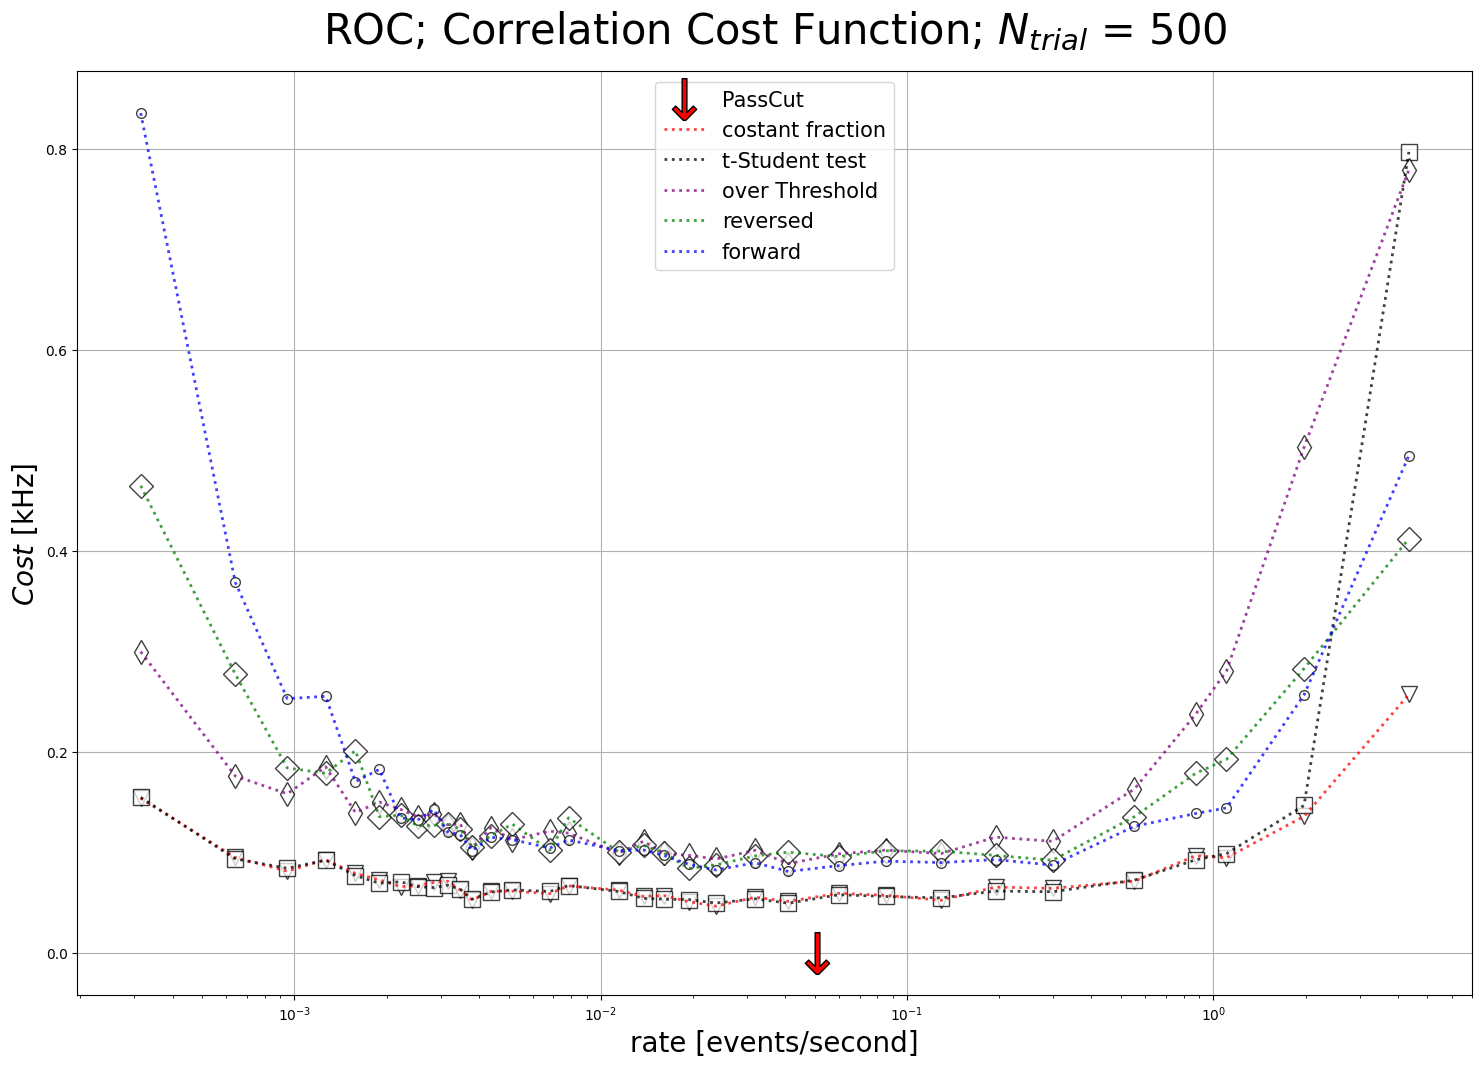

In [15]:
import matplotlib._color_data as mcd # package for colors

# list of colors for each combinations of parameters
overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}
overlap = list(overlap)
overlap = sorted(overlap, reverse=True)

# Find best configuration which minimize the cost
ind = np.unravel_index(np.argmin(ROC_cost_cf, axis = None), ROC_cost_cf.shape)
print("constant fraction:      ", ind, " combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_sum, axis = None), ROC_cost_sum.shape)
print("significance :          ", ind, " combination:", combinations[ind[0]])

#ind = np.unravel_index(np.argmin(ROC_cost_sign, axis = None), ROC_cost_sign.shape)
#print("significance  with mod: ", ind, " combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_rev, axis = None), ROC_cost_rev.shape)
print("Reversed:               ", ind, " combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_thr, axis = None), ROC_cost_thr.shape)
print("Threshold:              ", ind, " combination:", combinations[ind[0]])


# Find the best configuration of each algorithm with respect to each MVA points
print("Best combination for each points")
# CONSTANT FRACTION
minimaInd_cf = np.argmin(ROC_cost_cf, axis = 0)
best_cf = np.zeros(len(rate))
# significance  TEST
minimaInd_sum = np.argmin(ROC_cost_sum, axis = 0)
best_sum = np.zeros(len(rate))
# SIGNIFICANCE
minimaInd_sign = np.argmin(ROC_cost_sign, axis = 0)
best_sign = np.zeros(len(rate))
# THRESHOLD
minimaInd_thr = np.argmin(ROC_cost_thr, axis = 0)
best_thr = np.zeros(len(rate))
# REVERSED
minimaInd_rev = np.argmin(ROC_cost_rev, axis = 0)
best_rev = np.zeros(len(rate))
# FORWARD
minimaInd_veto = np.argmin(ROC_cost_veto, axis = 0)
best_veto = np.zeros(len(rate))


print("\n")
print("best combination for each point:")
print("t-student: best at each point: ", minimaInd_sum)

# Plot of the best configuration for each point
plt.figure(1,figsize = (18,12))

for i,item in enumerate(rate): # Loop on each MVA point
    # constant fraction
    index = minimaInd_cf[i]
    best_cf[i] = ROC_cost_cf[index][i]
    plt.errorbar(item, best_cf[i], linestyle = '', markersize = 12, marker = "v", color = "white",markeredgecolor='black', alpha = 0.75)
    #print("MVA point %d" % i, "combination: ",  index)
    # t-student
    index = minimaInd_sum[i]
    best_sum[i] = ROC_cost_sum[index][i]
    plt.errorbar(item, best_sum[i], linestyle = '',marker = "s", markersize = 12, color = "white", markeredgecolor='black', alpha = 0.75)
    # threshold
    index = minimaInd_thr[i]
    best_thr[i] = ROC_cost_thr[index][i]
    plt.errorbar(item, best_thr[i], linestyle = '',marker = "d", markersize = 12, color = "white", markeredgecolor='black', alpha = 0.75)
    # reversed
    index = minimaInd_rev[i]
    best_rev[i] = ROC_cost_rev[index][i]
    plt.errorbar(item, best_rev[i], linestyle = '',marker = "D", markersize =12, color = "white", markeredgecolor='black', alpha = 0.75)
    # forward
    index = minimaInd_veto[i]
    best_veto[i] = ROC_cost_veto[index][i]
    plt.errorbar(item, best_veto[i], linestyle = '',marker = ".", markersize = 14, color = "white", markeredgecolor='black', alpha = 0.75)

# PASSCUT

plt.title("ROC; Correlation Cost Function; " + r"$N_{trial}$ = " + str(Ntrial) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$Cost$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.ylim(-2.5,22.5)
plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$\downarrow$', markersize = 30, markeredgecolor='black', label = "PassCut", alpha = 1)
plt.errorbar(rate, best_cf , linestyle = 'dotted', color = "red", label = "costant fraction", linewidth = 2 ,alpha = 0.75)
plt.errorbar(rate, best_sum, linestyle = 'dotted', color = "black", label = r"t-Student test",linewidth = 2 , alpha = 0.75)
plt.errorbar(rate, best_thr, linestyle = 'dotted', color = "purple", label = "over Threshold", linewidth = 2 ,alpha = 0.75)
plt.errorbar(rate, best_rev, linestyle = 'dotted', color = "green", label = "reversed", linewidth = 2 ,alpha = 0.75)
plt.errorbar(rate, best_veto, linestyle = 'dotted', color = "blue", label = "forward", linewidth = 2 ,alpha = 0.75)
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/ROC_correlation.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/ROC_correlation.pdf", format = "pdf")

#### correlation of all the combinations together

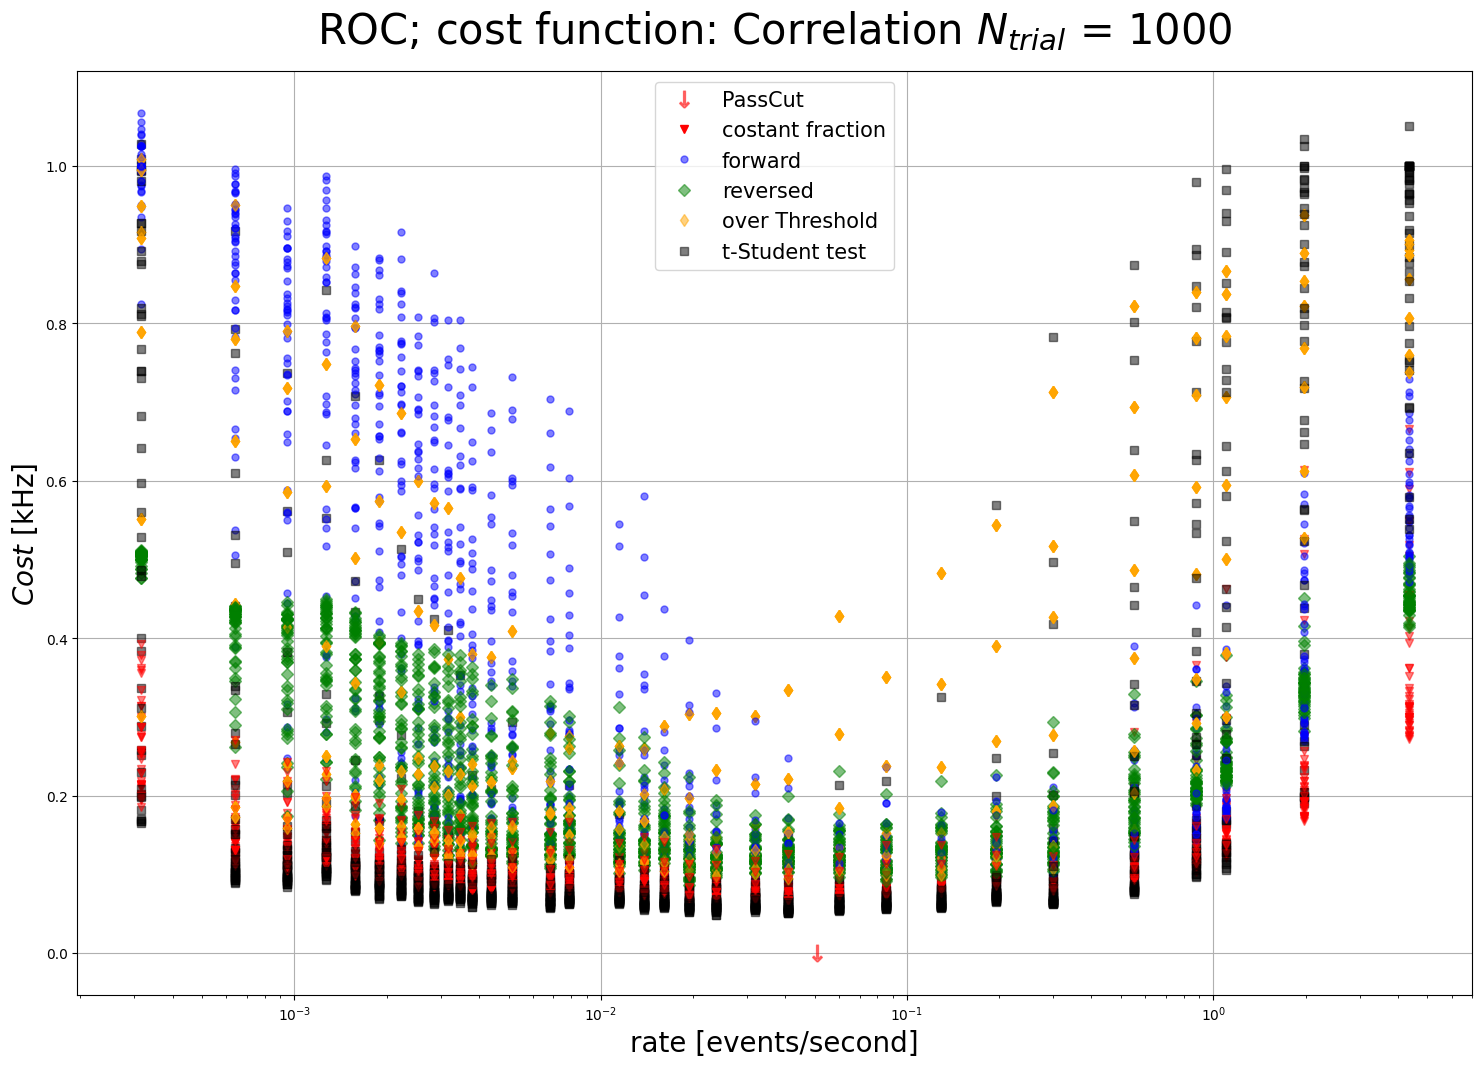

In [16]:
# SIGMA VERSUS rate
######################################################

plt.figure(0, figsize = (18,12))
plt.title("ROC; cost function: Correlation " + r"$N_{trial}$ = " + str(Ntrial) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$Cost$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.yticks(np.linspace(0,45,19))
#plt.yticks(np.linspace(-5,40,19))
#plt.ylim(0,20)
plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$\downarrow$', markersize = 12, label = "PassCut", alpha = 0.5)

for i in range(0, len(combinations)):
    if(i == 31):
        plt.errorbar(rate, ROC_cost_cf[i], linestyle = '', marker = "v", color = "red", label = "costant fraction", alpha = 1, linewidth = 1.5)
        plt.errorbar(rate, ROC_cost_veto[i], linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.5)
        plt.errorbar(rate, ROC_cost_rev[i], linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.5)
        plt.errorbar(rate, ROC_cost_thr[i], linestyle = '',marker = "d", color = "orange", label = "over Threshold", alpha = 0.5)
        plt.errorbar(rate, ROC_cost_sum[i], linestyle = '',marker = "s", color = "black", label = r"t-Student test", alpha = 0.5)
    else:
        plt.errorbar(rate, ROC_cost_cf[i], linestyle = '', marker = "v", color = "red",   alpha = 0.5)
        plt.errorbar(rate, ROC_cost_veto[i], linestyle = '',marker = ".", color = "blue", markersize = 10, alpha = 0.5)
        plt.errorbar(rate, ROC_cost_rev[i], linestyle = '',marker = "D", color = "green", alpha = 0.5)
        plt.errorbar(rate, ROC_cost_thr[i], linestyle = '',marker = "d", color = "orange", alpha = 0.5)
        plt.errorbar(rate, ROC_cost_sum[i], linestyle = '',marker = "s", color = "black", alpha = 0.5)

plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/ROC_all_correlation.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/ROC_all_correlation.pdf", format = "pdf")

### Look at the sigma: (ONSET_2 - ONSET_1)

Sigma min combination per MVA points:
 [ 4  5 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42
 42 42 42 42  5  5  5  5  3]
significance :  (45, 21)
combination: [10, 4, 0.4, 7, 10, 6]


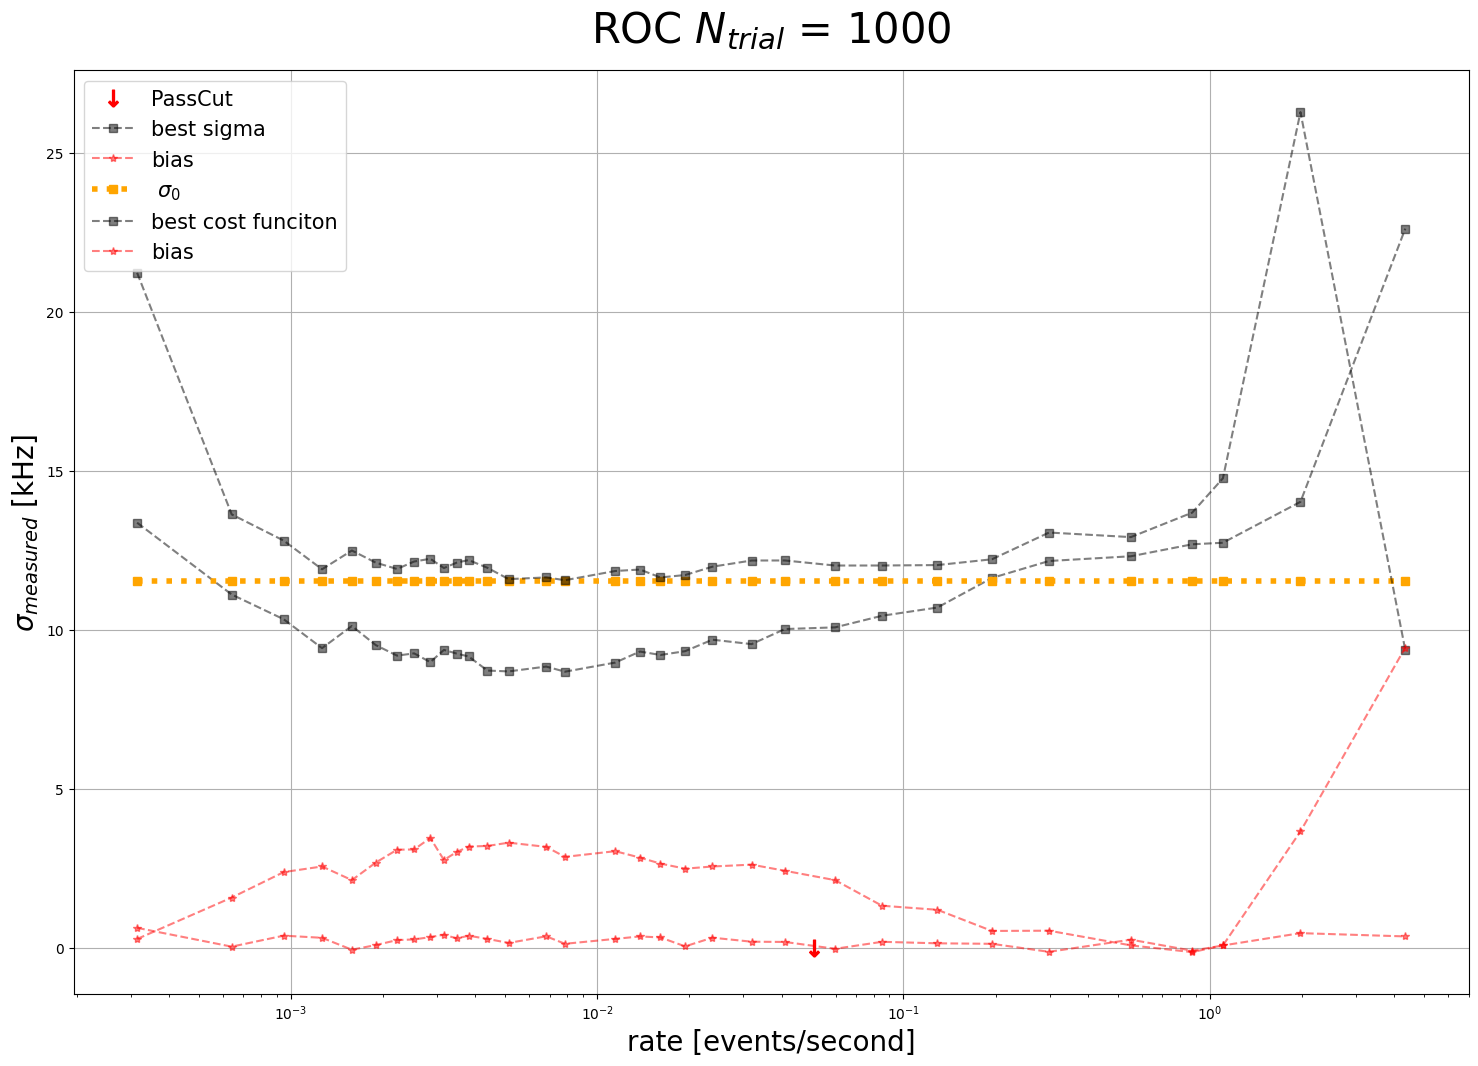

In [171]:
# significance  TEST
minimaInd_sum_sigma = np.argmin(ROC_sigmaSum, axis = 0)
print("Sigma min combination per MVA points:\n", minimaInd_sum_sigma)
ind_sigma = np.min(minimaInd_sum_sigma[3:28])
# Cost function
ind = np.unravel_index(np.argmin(ROC_cost_sum, axis = None), ROC_cost_sum.shape)
print("significance : ", ind)
print("combination:", combinations[ind[0]])

# SIGMA MEASURED: (ONSET_2 - ONSET_1)
plt.figure(65, figsize = (18,12))
plt.title("ROC " + r"$N_{trial}$ = " + str(Ntrial) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$\sigma_{measured}$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.yticks(np.linspace(0,45,19))
#plt.yticks(np.linspace(-5,40,19))
#plt.ylim(0,20)
plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$\downarrow$', markersize = 12, label = "PassCut", alpha = 1)

for i in range(0, len(combinations)):
    if(i == ind[0]):
        plt.errorbar(rate, np.ones(len(rate))*(40/np.sqrt(12)), linestyle = "dotted", marker = "s", color = "orange", linewidth = 4 ,label = r" $\sigma_{0}$")
        #plt.errorbar(rate, ROC_sigmaCf[i], linestyle = '', marker = "v", color = "red", label = "costant fraction", alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaVeto[i], linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaRev[i], linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaThr[i], linestyle = '',marker = "d", color = "orange", label = "over Threshold", alpha = 0.5)
        plt.errorbar(rate, ROC_sigmaSum[i], linestyle = '--',marker = "s", color = "black", label = r"best cost funciton", alpha = 0.5)
        plt.errorbar(rate, ROC_biasSum[i], linestyle = '--',marker = "*", color = "red", label = r"bias", alpha = 0.5)
    if(i == ind_sigma):
        #plt.errorbar(rate, ROC_sigmaCf[i], linestyle = '', marker = "v", color = "red", label = "costant fraction", alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaVeto[i], linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaRev[i], linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaThr[i], linestyle = '',marker = "d", color = "orange", label = "over Threshold", alpha = 0.5)
        plt.errorbar(rate, ROC_sigmaSum[i], linestyle = '--',marker = "s", color = "black", label = r"best sigma", alpha = 0.5)
        plt.errorbar(rate, ROC_biasSum[i], linestyle = '--',marker = "*", color = "red", label = r"bias", alpha = 0.5)
    elif(0):
        #plt.errorbar(rate, ROC_sigmaSum[i], linestyle = '--',marker = "*", color = "black",  alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaCf[i], linestyle = '', marker = "v", color = "red",   alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaVeto[i], linestyle = '',marker = ".", color = "blue",  markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaRev[i], linestyle = '',marker = "D", color = "green",  alpha = 0.5)
        #plt.errorbar(rate, ROC_sigmaThr[i], linestyle = '',marker = "d", color = "orange", alpha = 0.5)
        plt.errorbar(rate, ROC_sigmaSum[i], linestyle = '',marker = "s", color = "black",  alpha = 0.5)
        plt.errorbar(rate, ROC_biasSum[i], linestyle = '',marker = "*", color = "red",  alpha = 0.5)
        
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/ROC_Sigma_Algorithm_sum.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/ROC_Sigma_Algorithm_sum.pdf", format = "pdf")

In [ ]:

# SIGMA VERSUS RATE: (ONSET_2 - ONSET_1) - MC_TRUTH
plt.figure(1, figsize = (18,12))
plt.title("ROC " + r"$N_{trial}$ = " + str(Ntrial) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$\sigma$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.yticks(np.linspace(0,45,19))
#plt.yticks(np.linspace(-5,40,19))
#plt.ylim(0,20)
plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$*$', markersize = 12, label = "PassCut", alpha = 0.5)

for i in range(0, len(combinations)):
    if(i == 15):
        plt.errorbar(rate, ROC_stdCf[i], linestyle = '', marker = "v", color = "red", label = "costant fraction", alpha = 0.5)
        #plt.errorbar(rate, ROC_stdVeto[i], linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_stdRev[i], linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.5)
        #plt.errorbar(rate, ROC_stdThr[i], linestyle = '',marker = "d", color = "orange", label = "over Threshold", alpha = 0.5)
        #plt.errorbar(rate, ROC_stdSum[i], linestyle = '',marker = "s", color = "black", label = r"t-Student test", alpha = 0.5)
    else:
        plt.errorbar(rate, ROC_stdCf[i], linestyle = '', marker = "v", color = "red",   alpha = 0.5)
        #plt.errorbar(rate, ROC_stdVeto[i], linestyle = '',marker = ".", color = "blue",  markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_stdRev[i], linestyle = '',marker = "D", color = "green",  alpha = 0.5)
        #plt.errorbar(rate, ROC_stdThr[i], linestyle = '',marker = "d", color = "orange", alpha = 0.5)
        #plt.errorbar(rate, ROC_stdSum[i], linestyle = '',marker = "s", color = "black",  alpha = 0.5)
plt.legend(fontsize = 15)
#plt.savefig("Plot/mvaScan/ROCsum_sigma.jpg", format = "jpg")
#plt.savefig("Plot/mvaScan/ROCsum_sigma.pdf", format = "pdf")
plt.savefig("Plot/mvaScan/ROC_constantFraction_sigma.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/ROC_constantFraction_sigma.pdf", format = "pdf")

# BIAS VERSUS rate
plt.figure(2, figsize = (18,12))
plt.title("ROC " + r"$N_{trial}$ = " + str(Ntrial) , fontsize = 30)
plt.xlabel("rate [events/second]", fontsize = 20)
plt.ylabel(r"$bias$ [kHz]", fontsize = 20)
plt.xscale("log")
plt.grid()
#plt.yticks(np.linspace(0,45,19))
#plt.yticks(np.linspace(-5,40,19))
#plt.ylim(0,20)
plt.plot(0.051, 0, color = "red", linestyle = '', marker=r'$*$', markersize = 12, label = "PassCut", alpha = 0.5)

for i in range(0, len(combinations)):
    if(i == 3):
        plt.errorbar(rate, ROC_biasCf[i], linestyle = '', marker = "v", color = "red", label = "costant fraction", alpha = 0.5)
        #plt.errorbar(rate, ROC_biasVeto[i], linestyle = '',marker = ".", color = "blue", label = "forward", markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_biasRev[i], linestyle = '',marker = "D", color = "green", label = "reversed", alpha = 0.5)
        #plt.errorbar(rate, ROC_biasThr[i], linestyle = '',marker = "d", color = "orange", label = "over Threshold", alpha = 0.5)
        #plt.errorbar(rate, ROC_biasSum[i], linestyle = '',marker = "s", color = "black", label = r"t-Student test", alpha = 0.5)
    elif(1):
        plt.errorbar(rate, ROC_biasCf[i], linestyle = '', marker = "v", color = "red",   alpha = 0.5)
        #plt.errorbar(rate, ROC_biasVeto[i], linestyle = '',marker = ".", color = "blue",  markersize = 10, alpha = 0.5)
        #plt.errorbar(rate, ROC_biasRev[i], linestyle = '',marker = "D", color = "green",  alpha = 0.5)
        #plt.errorbar(rate, ROC_biasThr[i], linestyle = '',marker = "d", color = "orange", alpha = 0.5)
        #plt.errorbar(rate, ROC_biasSum[i], linestyle = '',marker = "s", color = "black",  alpha = 0.5)
plt.legend(fontsize = 15)
#plt.savefig("Plot/mvaScan/ROC_sum_bias.jpg", format = "jpg")
#plt.savefig("Plot/mvaScan/ROC_sum_bias.pdf", format = "pdf")
plt.savefig("Plot/mvaScan/ROC_constantFraction_bias.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/ROC_constantFraction_bias.pdf", format = "pdf")



## THRESHOLD VERSUS BACKGROUND

constant fraction:  (10, 11)
combination: [11, 4.5, 0.35, 2, 4, 7]
significance :  (9, 17)
combination: [10, 4.5, 0.35, 11, 4, 6]
Reversed:  (9, 17)
combination: [10, 4.5, 0.35, 11, 4, 6]
Threshold:  (6, 24)
combination: [7, 4.5, 0.35, 8, 4, 3]
Threshold:  (2, 18)
combination: [3, 4.5, 0.35, 4, 3, 5]
combination sum: 9 4.5


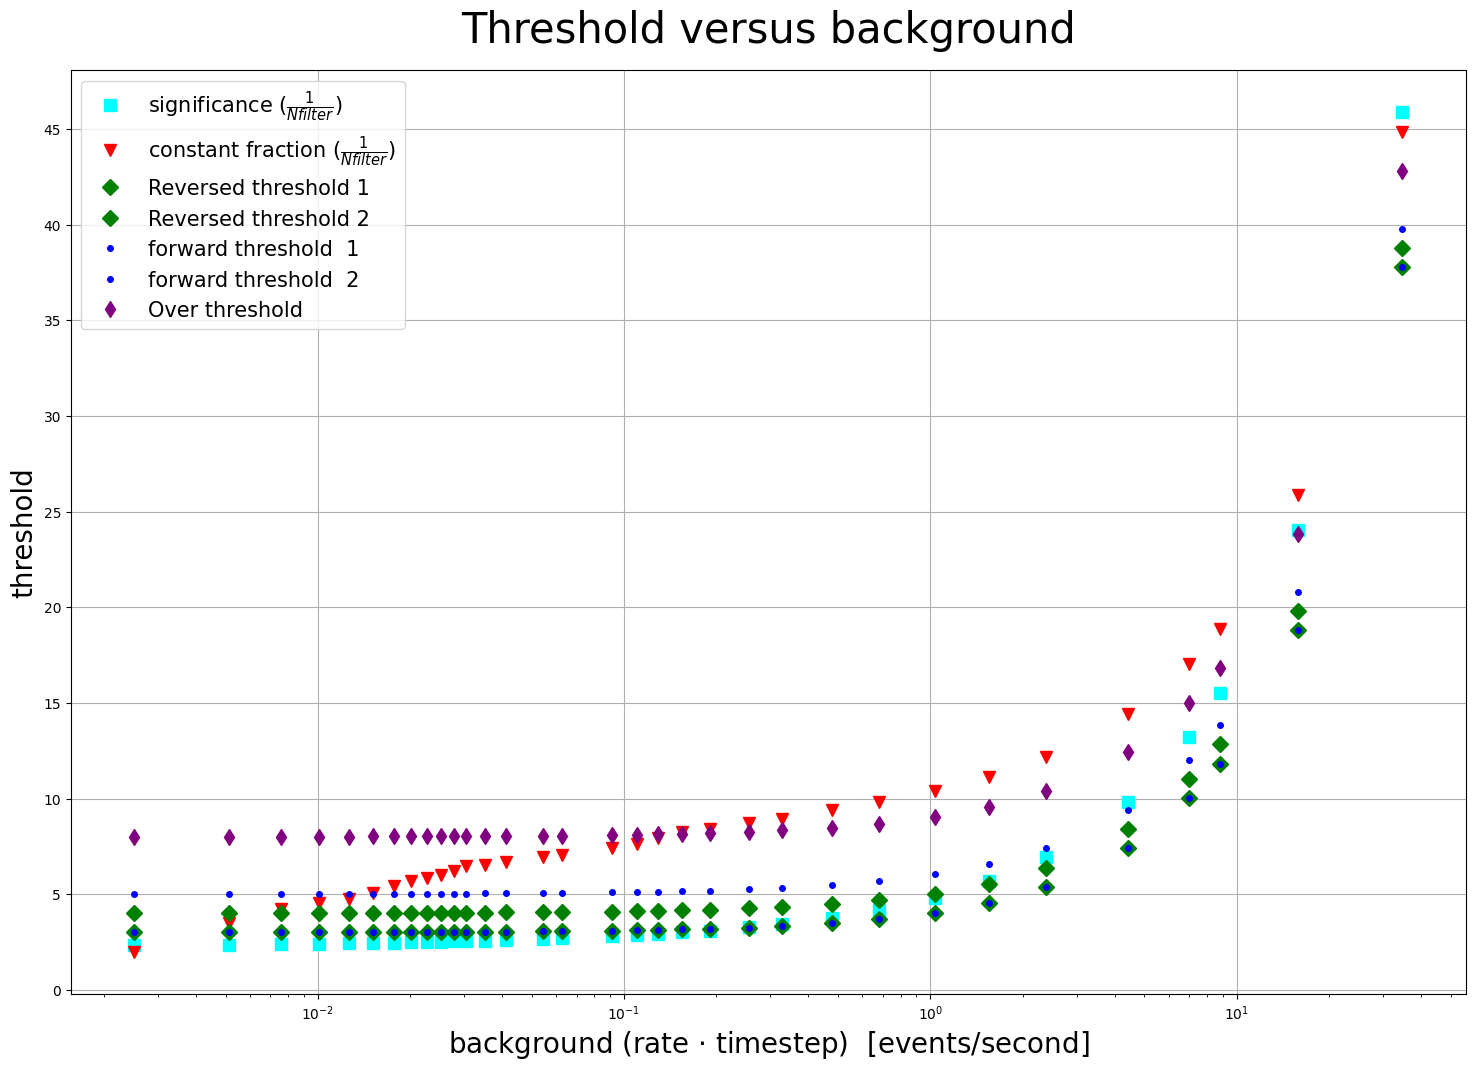

In [36]:
timestep = 8
background = rate*timestep

ind_cf = np.unravel_index(np.argmin(ROC_cost_cf, axis = None), ROC_cost_cf.shape)
print("constant fraction: ", ind_cf)
print("combination:", combinations[ind_cf[0]])

ind_sum = np.unravel_index(np.argmin(ROC_cost_sum, axis = None), ROC_cost_sum.shape)
print("significance : ", ind)
print("combination:", combinations[ind[0]])

ind = np.unravel_index(np.argmin(ROC_cost_rev, axis = None), ROC_cost_rev.shape)
print("Reversed: ", ind)
print("combination:", combinations[ind[0]])

ind_thr = np.unravel_index(np.argmin(ROC_cost_thr, axis = None), ROC_cost_thr.shape)
print("Threshold: ", ind_thr)
print("combination:", combinations[ind_thr[0]])

ind_veto = np.unravel_index(np.argmin(ROC_cost_veto, axis = None), ROC_cost_veto.shape)
print("Threshold: ", ind_veto)
print("combination:", combinations[ind_veto[0]])

# t-student
Nfilter = combinations[ind_sum[0]][0]
Nsigma = combinations[ind_sum[0]][1]
print("combination sum:" , Nfilter, Nsigma)
thr_sum = Nfilter*(background) + Nsigma*np.sqrt(Nfilter*background)
Nfilter_sum = Nfilter

# Significance 
#Nfilter*(background)
thr_sum2 = Nfilter*(background) + Nsigma**2  + Nsigma*np.sqrt(Nfilter*background)

# reversed
thr_veto1 = background + combinations[ind_veto[0]][4]
thr_veto2 = background + combinations[ind_veto[0]][5]

# reversed
thr_rev1 = background + combinations[6][4]
thr_rev2 = background + combinations[6][5]

# Threshold
thr_thr = background + combinations[ind_thr[0]][3]

# Constant fraction
Nfilter = combinations[ind_cf[0]][0]
fraction = combinations[ind_cf[1]][2]
Nhbar = 20.58; Nstack = 20
peak = 0.078*Nhbar*Nstack*efficiency + background
thr_cf = Nfilter*(background + (peak - background)*fraction)
Nfilter_cf = Nfilter

plt.figure(5234421412, figsize = (18,12))
plt.title("Threshold versus background", fontsize = 30)
plt.xscale('log')
plt.xlabel(r"background (rate $\cdot$ timestep)  [events/second]", fontsize = 20)
plt.ylabel("threshold", fontsize = 20)
plt.yticks(np.linspace(0,50,11))
plt.grid()
#plt.errorbar(background, thr_sum/Nfilter_sum, linestyle = '', marker = 's', color = 'black', label = r"t-student (old) ($\frac{1}{Nfilter}$)" ,markersize = 8)
plt.errorbar(background, thr_sum2/Nfilter_sum, linestyle = '', marker = 's', color = 'cyan', label = r"significance ($\frac{1}{Nfilter}$)" ,markersize = 8)
plt.errorbar(background, thr_cf/Nfilter_cf, linestyle = '', marker = 'v', color = 'red', label = r"constant fraction ($\frac{1}{Nfilter}$)" ,markersize = 8)
plt.errorbar(background, thr_rev1, linestyle = '', marker = 'D', color = 'green', label = "Reversed threshold 1" ,markersize = 8)
plt.errorbar(background, thr_rev2, linestyle = '', marker = 'D', color = 'green', label = "Reversed threshold 2" ,markersize = 8)
plt.errorbar(background, thr_veto1, linestyle = '', marker = '.', color = 'blue', label = "forward threshold  1" ,markersize = 8)
plt.errorbar(background, thr_veto2, linestyle = '', marker = '.', color = 'blue', label = "forward threshold  2" ,markersize = 8)
plt.errorbar(background, thr_thr, linestyle = '', marker = 'd', color = 'purple', label = "Over threshold" ,markersize = 8)
plt.legend(fontsize = 15)
plt.savefig("Plot/mvaScan/Thresholds_vs_rate.jpg", format = "jpg")
plt.savefig("Plot/mvaScan/Thresholds_vs_rate.pdf", format = "pdf")